# Project Overivew

**Predicting the prices of cars and trucks imported in 1985**. The aim of this project is to analyze the various characteristics of a vehicle and eventually predict the price of the vehicle given its various characteristics. This can be helpful when trying to understand the market, which features are pricing points and based on the features of the vehicle, what could be its price, for a new manufacturer. 

The dataset contains information on **205** vehicles imported in the year of 1985 from various manufacturers. It is a dataset from the UCI repository of automobiles. Dataset information:

1. **Number of Instances:** 205

2. **Number of Attributes:** 26 
   
   - 15 continuous
   
   - 1 integer
   
   - 10 nominal


3. **Attribute Information**:        
      - symboling:                -3, -2, -1, 0, 1, 2, 3.
      - normalized-losses:        continuous from 65 to 256.
      - make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
      - fuel-type:                diesel, gas.
      - aspiration:               std, turbo.
      - num-of-doors:             four, two.
      - body-style:               hardtop, wagon, sedan, hatchback, convertible.
      - drive-wheels:             4wd, fwd, rwd.
      - engine-location:          front, rear.      
      - wheel-base:               continuous from 86.6 120.9.
      - length:                   continuous from 141.1 to 208.1.
      - width:                    continuous from 60.3 to 72.3.
      - height:                   continuous from 47.8 to 59.8.
      - curb-weight:              continuous from 1488 to 4066.
      - engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
      - num-of-cylinders:         eight, five, four, six, three, twelve, two.
      - engine-size:              continuous from 61 to 326.
      - fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
      - bore:                     continuous from 2.54 to 3.94.
      - stroke:                   continuous from 2.07 to 4.17.
      - compression-ratio:        continuous from 7 to 23.
      - horsepower:               continuous from 48 to 288.
      - peak-rpm:                 continuous from 4150 to 6600.
      - city-mpg:                 continuous from 13 to 49.
      - highway-mpg:              continuous from 16 to 54.
      - price:                    continuous from 5118 to 45400.
      
There are a total of 25 characteristics related to a vehicle that have to be analyzed in order to find the best predictors for its price.      

# Imports

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Functions

In [153]:
plt.style.use('fivethirtyeight')

def decode_symboling(row):    
    if row == -2:
        return 'Very safe'
    elif row == -1:
        return 'Safe'
    elif row == 0:
        return 'Neutral'
    elif row == 1:
        return 'Maybe risky'
    elif row == 2:
        return 'Risky'
    else:
        return 'Very risky'

def box_plot(df, column, title, xlabel, multiple=False, ycolumn=None):
    plt.figure(figsize=(20,10))
    if multiple:
        sns.boxplot(x=df[column], y=df[ycolumn])
    else:
        sns.boxplot(df[column])
    plt.xlabel(xlabel)
    sns.despine(left=True)
    plt.title(title)
    plt.show()

def distribution_plot(df, column, title, with_mean=True):
    
    plt.figure(figsize=(20,10))
    df[column].plot.hist()
    if with_mean:
        plt.axvline(df[column].mean(), color='black', label='mean')
    plt.title(title)
    plt.legend()

def get_bar_colors(values):
    colors = []
    for val in values:
        if val == values.min():
            colors.append('green')
        else:
            colors.append('red')
    return colors


def multiple_subplots(finale_rmses, suptitle, title, xlabel, ylabel, sigbar_x=-4.1, sigbar_y=-3):
    
    fig, ax = plt.subplots(3, 2, figsize=(30,40), sharex=True, sharey=True,)
    current_ax = 0
    for key in finale_rmses:
        pos_x = 0
        pos_y = current_ax
        if current_ax > 2:
            pos_x = 1
            pos_y = 3 - current_ax
            
            
        values = pd.Series(finale_rmses[k])
        colors = get_bar_colors(values)
        ax[pos_y][pos_x].barh(values.index, values.values, color=colors)
        current_ax += 1
        
        ax[pos_y][pos_x].set_title(title + ' (k=' + str(key) + ')', y = 1.07, weight='bold')  
                
        
        for side in ['top', 'right', 'left']:
            ax[pos_y][pos_x].spines[side].set_visible(False)
                                    
    
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)   
    fig.text(0.5, 0.04, xlabel, fontsize=24, ha='center', weight='bold')
    fig.text(-0.04, 0.5, ylabel, fontsize=24, va='center', rotation='vertical', weight='bold')
    
    fig.suptitle(suptitle, weight='bold', fontsize=28)
    
    # The signature bar
    plt.text(x = sigbar_x, y = sigbar_y,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                                                                                                                                                                       Source: www.https://https://github.com/raduspaimoc',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = '#868786')    
    
    plt.show()

def plot_horizontal_bar(series, title, xlabel, ytlabels, sigbar_x=-4.1, sigbar_y=-3, with_sort=True):    
    fig, ax = plt.subplots(figsize=(20,10))
    
    if with_sort:
        series.sort_index().plot.barh(color='tab:blue')
    else:
         series.plot.barh(color='tab:blue')
    
    ax.set_title(title, y = 1.07)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.set_ylabel(ytlabels, fontsize=19)
    
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
    #ax.set_yticklabels(ytlabels)
    
    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible(False)
    
    # Generate a bolded horizontal line at y = 0
    plt.axvline(x = 0, color = 'black', linewidth = 1.3, alpha = .7)
    
    # The signature bar
    plt.text(x = sigbar_x, y = sigbar_y,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                        Source: www.https://https://github.com/raduspaimoc',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = '#868786')
    plt.show() 

def knn_train_test(training_column, target_column, df, n_neighbors=5):
    
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    # Fit a KNN model using default k value.    
    knn.fit(train_df[training_column], train_df[target_column])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[training_column])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_column], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

def get_orderd_dataframe(column, num_features, finale_df):
    aux = finale_df[["k", column]].copy()
    aux["features"] = num_features
    aux.rename(columns={column: "RMSE"}, inplace=True)
    return aux

def get_residual_plots(algorithm, pred_test, y_test):
    f, axes = plt.subplots(1, 2, figsize=(20,12))
    sns.scatterplot(x=pred_test,y=(pred_test-y_test), ax=axes[1])
    plt.hlines(0,xmax=35000,xmin=0,linestyles='dotted',colors='grey')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residual Error')
    axes[1].title.set_text('Residual Plot')

    sns.distplot((pred_test-y_test), ax=axes[0])
    plt.xlabel('Residual')
    axes[0].title.set_text('Residual Histogram')
    f.suptitle(algorithm)

# Data Cleaning

The dataset inherently doesnot have column names. The column names have been picked up from the above specified list.

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [4]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
cars.symboling.value_counts(dropna=False)

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
cars["normalized-losses"].value_counts(dropna=False)

?      41
161    11
91      8
150     7
134     6
104     6
128     6
74      5
94      5
85      5
103     5
168     5
95      5
65      5
102     5
122     4
106     4
148     4
93      4
118     4
154     3
125     3
101     3
137     3
83      3
115     3
164     2
188     2
129     2
153     2
158     2
108     2
89      2
81      2
110     2
119     2
197     2
87      2
192     2
113     2
194     2
145     2
78      1
142     1
98      1
77      1
107     1
90      1
256     1
231     1
186     1
121     1
Name: normalized-losses, dtype: int64

In [9]:
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

The dataset as such doesnot contain any **NaN** values, but there are **'?'** as values, which in this case are reprsenting NaN values.

# Exploratory Analysis

In [10]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
cars = cars.replace('?', np.nan)

In [12]:
cars[cars["num-of-doors"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [13]:
cars[cars["body-style"] == 'sedan']['num-of-doors'].value_counts(dropna=False)

four    79
two     15
NaN      2
Name: num-of-doors, dtype: int64

In [14]:
cars["num-of-doors"].fillna(cars[cars["body-style"] == 'sedan']['num-of-doors'].mode()[0], inplace=True)

In [15]:
cars[cars["body-style"] == 'sedan']['num-of-doors'].value_counts(dropna=False)

four    81
two     15
Name: num-of-doors, dtype: int64

In [16]:
cars['num-of-doors'].value_counts(dropna=False)

four    116
two      89
Name: num-of-doors, dtype: int64

In [17]:
cars.loc[cars['num-of-doors']=="four", 'num-of-doors'] = 4
cars.loc[cars['num-of-doors']=="two", 'num-of-doors'] = 2
cars['num-of-doors'] = cars['num-of-doors'].astype(int)

In [18]:
cars['num-of-doors'].value_counts(dropna=False)

4    116
2     89
Name: num-of-doors, dtype: int64

In [19]:
cars[cars["normalized-losses"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,4,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,4,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,2,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,4,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [20]:
cars.isnull().sum()[cars.isnull().sum() > 0]

normalized-losses    41
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [21]:
cars.isnull().sum()[cars.isnull().sum() > 0].index.tolist()

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

The dataset is pretty much clean except a few columns containing **Null** values. These Null values have to be cleaned before starting analysis on it. 

**Price** is the column that we want to predict, so all the rows with missing values for this column will be removed having in to acount that imputing is not posible. 

In [22]:
cars = cars.dropna(subset=['price'])

In [23]:
continuous_cols = ['normalized-losses', 
                   'wheel-base', 
                   'length', 
                   'width', 
                   'height', 
                   'curb-weight', 
                   'engine-size', 
                   'bore', 
                   'stroke', 
                   'compression-rate', 
                   'horsepower', 
                   'peak-rpm', 
                   'city-mpg', 
                   'highway-mpg', 
                   'num-of-doors',
                   'price']

In [24]:
numeric_cars = cars[continuous_cols].copy()
numeric_cars = numeric_cars.astype(float)

## Data imputation

The **normalized-losses** column contains the **maximum NaN** values the dataset. Dropping **41 rows** will highly reduce the dataset and possibly lose out on valuable information of other columns.
These **NaN**values must be imputed. The distribution of **normalized-losses** column can give a sense of how this can be achieved.

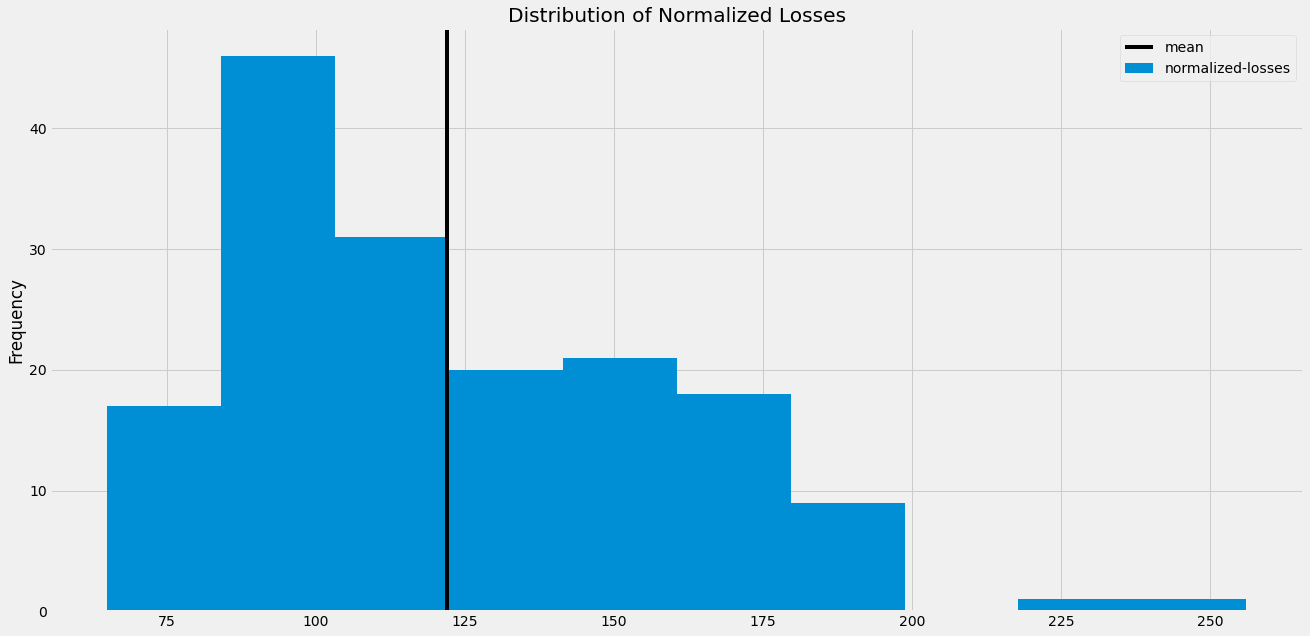

In [25]:
distribution_plot(numeric_cars, 
                  'normalized-losses', 
                  'Distribution of Normalized Losses', 
                  with_mean=True)

The previous distribution plot shows that most of the **normalized-losses** are close to the mean. So, imputing the **41** missing rows with the mean will not change the general distributionon of the column.

In [26]:
numeric_cars["normalized-losses"].fillna(numeric_cars["normalized-losses"].mean(), inplace=True)

Check remaining columns with missing values:

In [27]:
numeric_cars.isnull().sum()[numeric_cars.isnull().sum() > 0]

bore          4
stroke        4
horsepower    2
peak-rpm      2
dtype: int64

The bore and stroke columns have 4 missing values. The bore defines the diameter of the piston cylinder and stroke defines the length of the piston cylinder. These values are usually specific to a vehicle and even vehicles from the same manufacturer do not have the same values for bore and stroke. Imputing these values requires alot of other parameters such as horsepower, engine capacity, pressure values, stroke length etc.

In [28]:
numeric_cars[numeric_cars.bore.isna()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,num-of-doors,price
55,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,2.0,10945.0
56,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,2.0,11845.0
57,150.0,95.3,169.0,65.7,49.6,2385.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,2.0,13645.0
58,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,2.0,15645.0


Analyzing the missing values, the rows containing the **missing bore values also have missing values for stroke**. This makes it impossible to derive either bore or stroke values for these rows. Since the question is of **4** rows, these can be **ignored** without possible loss of information.

In [29]:
numeric_cars.dropna(subset=['bore','stroke'],inplace=True)
cars.dropna(subset=['bore','stroke'],inplace=True)

In [30]:
numeric_cars[numeric_cars.horsepower.isna()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,num-of-doors,price
130,122.0,96.1,181.5,66.5,55.2,2579.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,4.0,9295.0
131,122.0,96.1,176.8,66.6,50.5,2460.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,2.0,9895.0


The horsepower and the peak_rpm columns both contain **2 missing values**. A closer look into the missing values shows that the same two vehicles **have missing horsepower and peak-rpm**. Due to lack of data, these values cannot be calculated readily. Hence these two rows are also dropped from the dataset.

In [31]:
numeric_cars.dropna(subset=['horsepower','peak-rpm'],inplace=True)
cars.dropna(subset=['horsepower','peak-rpm'],inplace=True)

As we expected, now our dataset doesn't contain any missing value for the numeric columns.

In [32]:
numeric_cars.isnull().sum()[numeric_cars.isnull().sum() > 0]

Series([], dtype: int64)

## Target Feature Outliers

The dataset is clean from any missing values. The next step is to analyze these various charateristics. The price column is the target column for the predictive modeling and the base for the analysis. Looking into the distribution of price via a box plot reveals a significant number of outliers.

/home/radu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


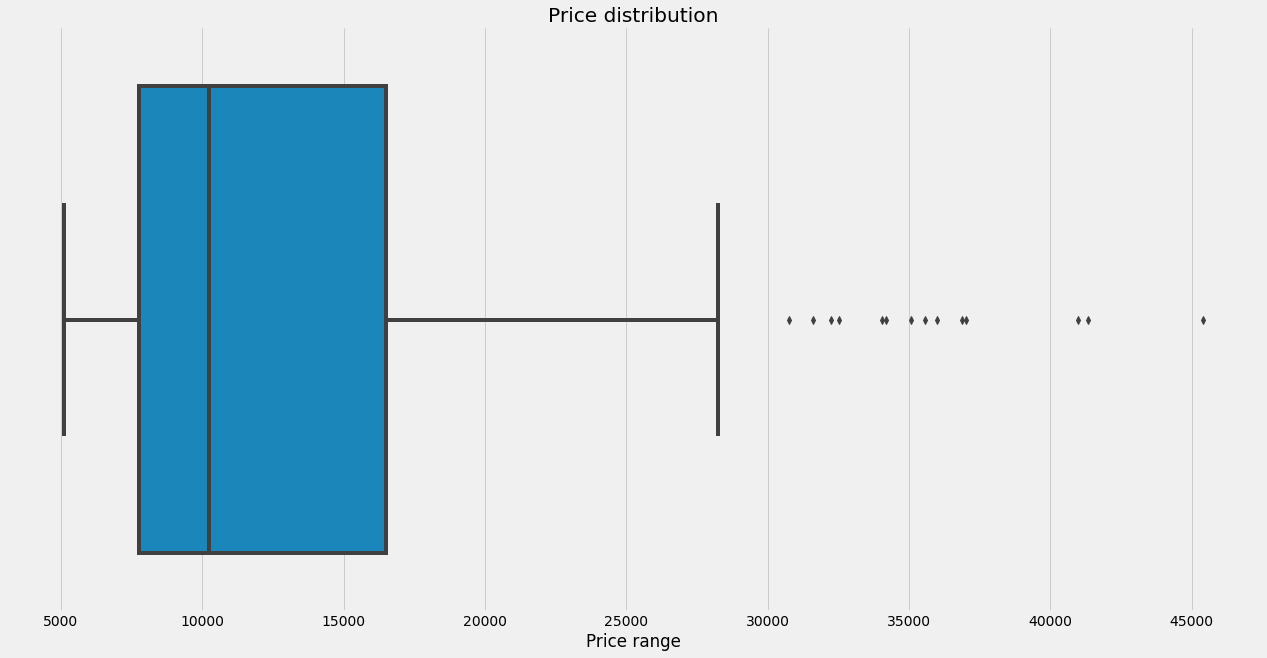

In [33]:
box_plot(numeric_cars, 'price', 'Price distribution', 'Price range')

The outliers exist beyond the **30k** mark. This data could be faulty, let's make a detailed analysis of this cases.

In [34]:
numeric_cars[numeric_cars.price > 30000]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,num-of-doors,price
15,122.0,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,4.0,30760.0
16,122.0,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,2.0,41315.0
17,122.0,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,4.0,36880.0
47,145.0,113.0,199.6,69.6,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,4.0,32250.0
48,122.0,113.0,199.6,69.6,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,4.0,35550.0
49,122.0,102.0,191.7,70.6,47.8,3950.0,326.0,3.54,2.76,11.5,262.0,5000.0,13.0,17.0,2.0,36000.0
70,93.0,115.6,202.6,71.7,56.3,3770.0,183.0,3.58,3.64,21.5,123.0,4350.0,22.0,25.0,4.0,31600.0
71,122.0,115.6,202.6,71.7,56.5,3740.0,234.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,4.0,34184.0
72,142.0,96.6,180.3,70.5,50.8,3685.0,234.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,2.0,35056.0
73,122.0,120.9,208.1,71.7,56.7,3900.0,308.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,4.0,40960.0


The outliers do not look faulty, rather the vehicles listed seems to be high end vehicles.

## Features correlation

### High correlated features

In [35]:
numeric_cars.corr()['price']

normalized-losses    0.135778
wheel-base           0.585793
length               0.695331
width                0.754273
height               0.138291
curb-weight          0.835729
engine-size          0.888942
bore                 0.546873
stroke               0.093746
compression-rate     0.069500
horsepower           0.811027
peak-rpm            -0.104333
city-mpg            -0.702685
highway-mpg         -0.715590
num-of-doors         0.042355
price                1.000000
Name: price, dtype: float64

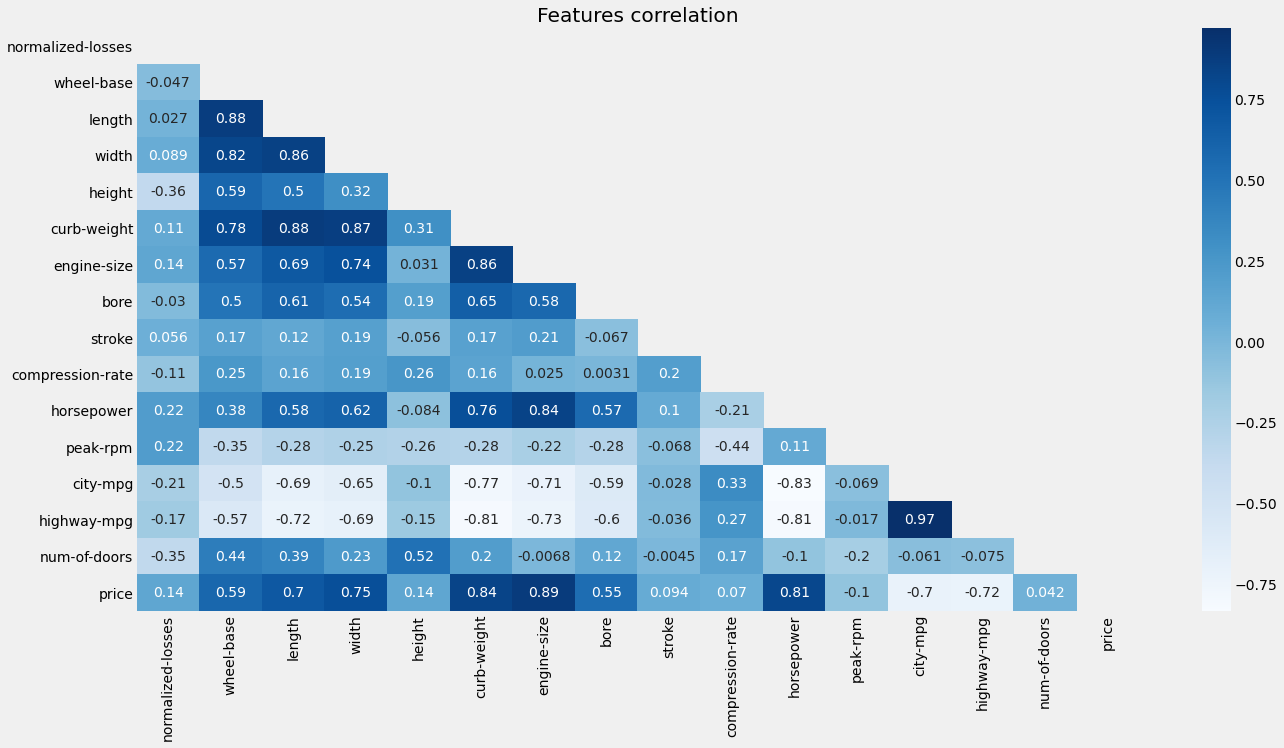

In [36]:
plt.figure(figsize=(20, 10))
mask = np.triu(numeric_cars.corr())
sns.heatmap(numeric_cars.corr(), mask=mask, annot=True, cmap="Blues")
plt.title("Features correlation")
plt.show()

In [37]:
corr_aux = numeric_cars.corr()['price']
corr_aux = corr_aux[corr_aux.index != 'price']

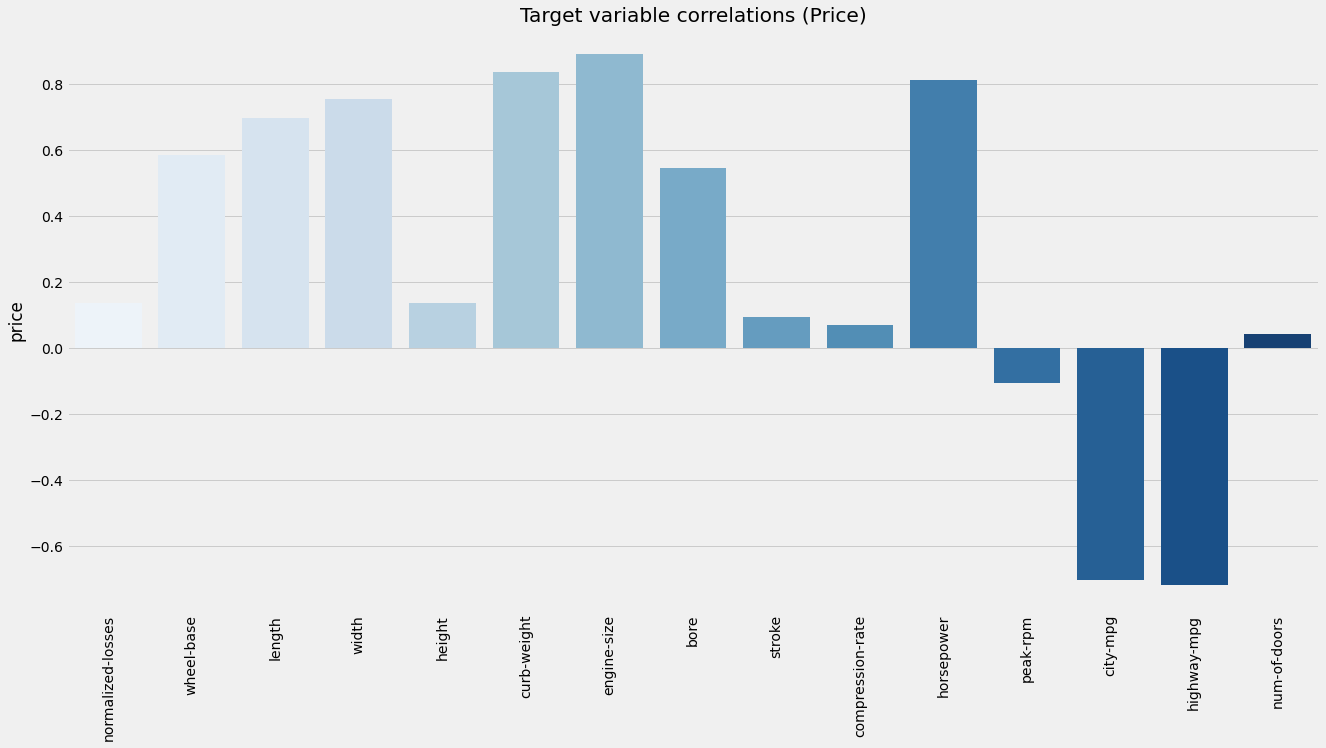

In [38]:
plt.figure(figsize=(20, 10))
sns.barplot(x=corr_aux.index,
            y=corr_aux, 
            palette="Blues")
plt.title("Target variable correlations (Price)")
plt.xticks(rotation=90)
plt.show()

From the previous charts we can conclude that the following features are low correlated with the price:
- normalized-loses
- height
- stroke
- compression-rate
- peak-rpm
- num-of-doors
    
We will use a **threshold** of **0.5** to discard low correlated features with the target.    

### City, higway and fuel economy

From the **Features correlation** we also can see that **city_mpg** and **highway_mpg** are high correlated features with **0.97**.

We can define this features as:
- **city_mpg:** column describes the average miles per gallon (mileage) the car delivers when driven in the city with occasional accelerations and brakes.
- **highway_mpg:** he average miles per gallon (mileage) the car delivers under continuos acceleration. 

Both metrics are considered very important. But, define individual charateristics of the vehicle, both measured separately. These values for a vehicle are measured under the assumption that the car is driven only in particular setting i.e. city_mpg for a vehicle is measured under the assumption that the vehicle is only driven in the city.
In reality the vehicle isnt always only exposed to either one. There is a combination of both city driving and highway driving, this makes a huge difference in the actual mileage (in mpg) the vehicle can achieve. So, we define a third variable (we considered the corresponding percentages realistic):

- **fuel_economy:** is assumed to be 60% of city_mpg and 40% of highway_mpg. 


In [39]:
numeric_cars['fuel_economy'] = (numeric_cars["city-mpg"] * 0.6) + (numeric_cars["highway-mpg"] * 0.4)

In [40]:
numeric_cars['fuel_economy']

0      23.4
1      23.4
2      21.8
3      26.4
4      19.6
       ... 
200    25.0
201    21.4
202    20.0
203    26.4
204    21.4
Name: fuel_economy, Length: 195, dtype: float64

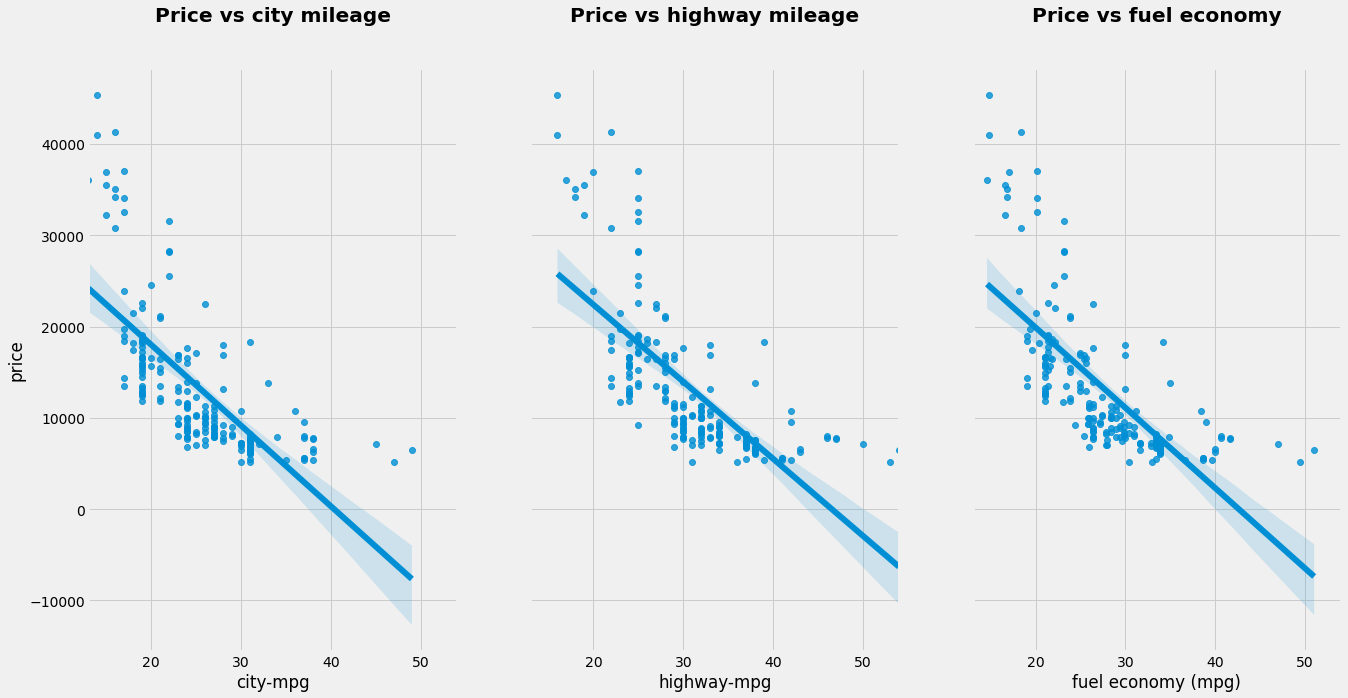

In [41]:
f, axs = plt.subplots(1, 3, figsize=(20,10), sharex=True, sharey=True,)

g1 = sns.regplot(y='price',x='city-mpg',data=numeric_cars, ax=axs[0])
plt.xlabel('city mileage (mpg)')
axs[0].set_title('Price vs city mileage', y = 1.07, weight='bold')


g2 = sns.regplot(y='price',x='highway-mpg',data=numeric_cars, ax=axs[1])
g2.set(ylabel=None)
plt.xlabel('highway mileage (mpg)')
axs[1].set_title('Price vs highway mileage', y = 1.07, weight='bold')  
plt.title('Price vs highway mileage')

g3 = sns.regplot(y='price',x='fuel_economy',data=numeric_cars, ax=axs[2])
g3.set(ylabel=None)
plt.xlabel('fuel economy (mpg)')
axs[2].set_title('Price vs fuel economy', y = 1.07, weight='bold')  


plt.show()

From the previous regplots, the following conclusions are drawn:
- Both city mileage and highway mileage (in mpg) are negatively correlated to the price of the vehicle.
- Since the fuel_economy is a representation of the city_mpg and highway_mpg combined, it mimics the trend as seen above.

### Target feature relation with numeric features

In the previous subsection we have created a new variable combining two numeric features and we have shown a comparison of their regression plots agains the target feature.

The regplot fits a regressor to the data and draws the best fitting line across the data. The regplot gives insight into the relationship between two variables. This shall give an idea as to which charateristics are correlated to the price. In other words will help us to gain more insights by seeing their correlation indexes and their regression lines.

In [42]:
numeric_cols = ['wheel-base',
 'length',
 'width', 
 'curb-weight',
 'engine-size',
 'bore',  
 'horsepower', 
 'city-mpg',
 'highway-mpg', 
 'fuel_economy']

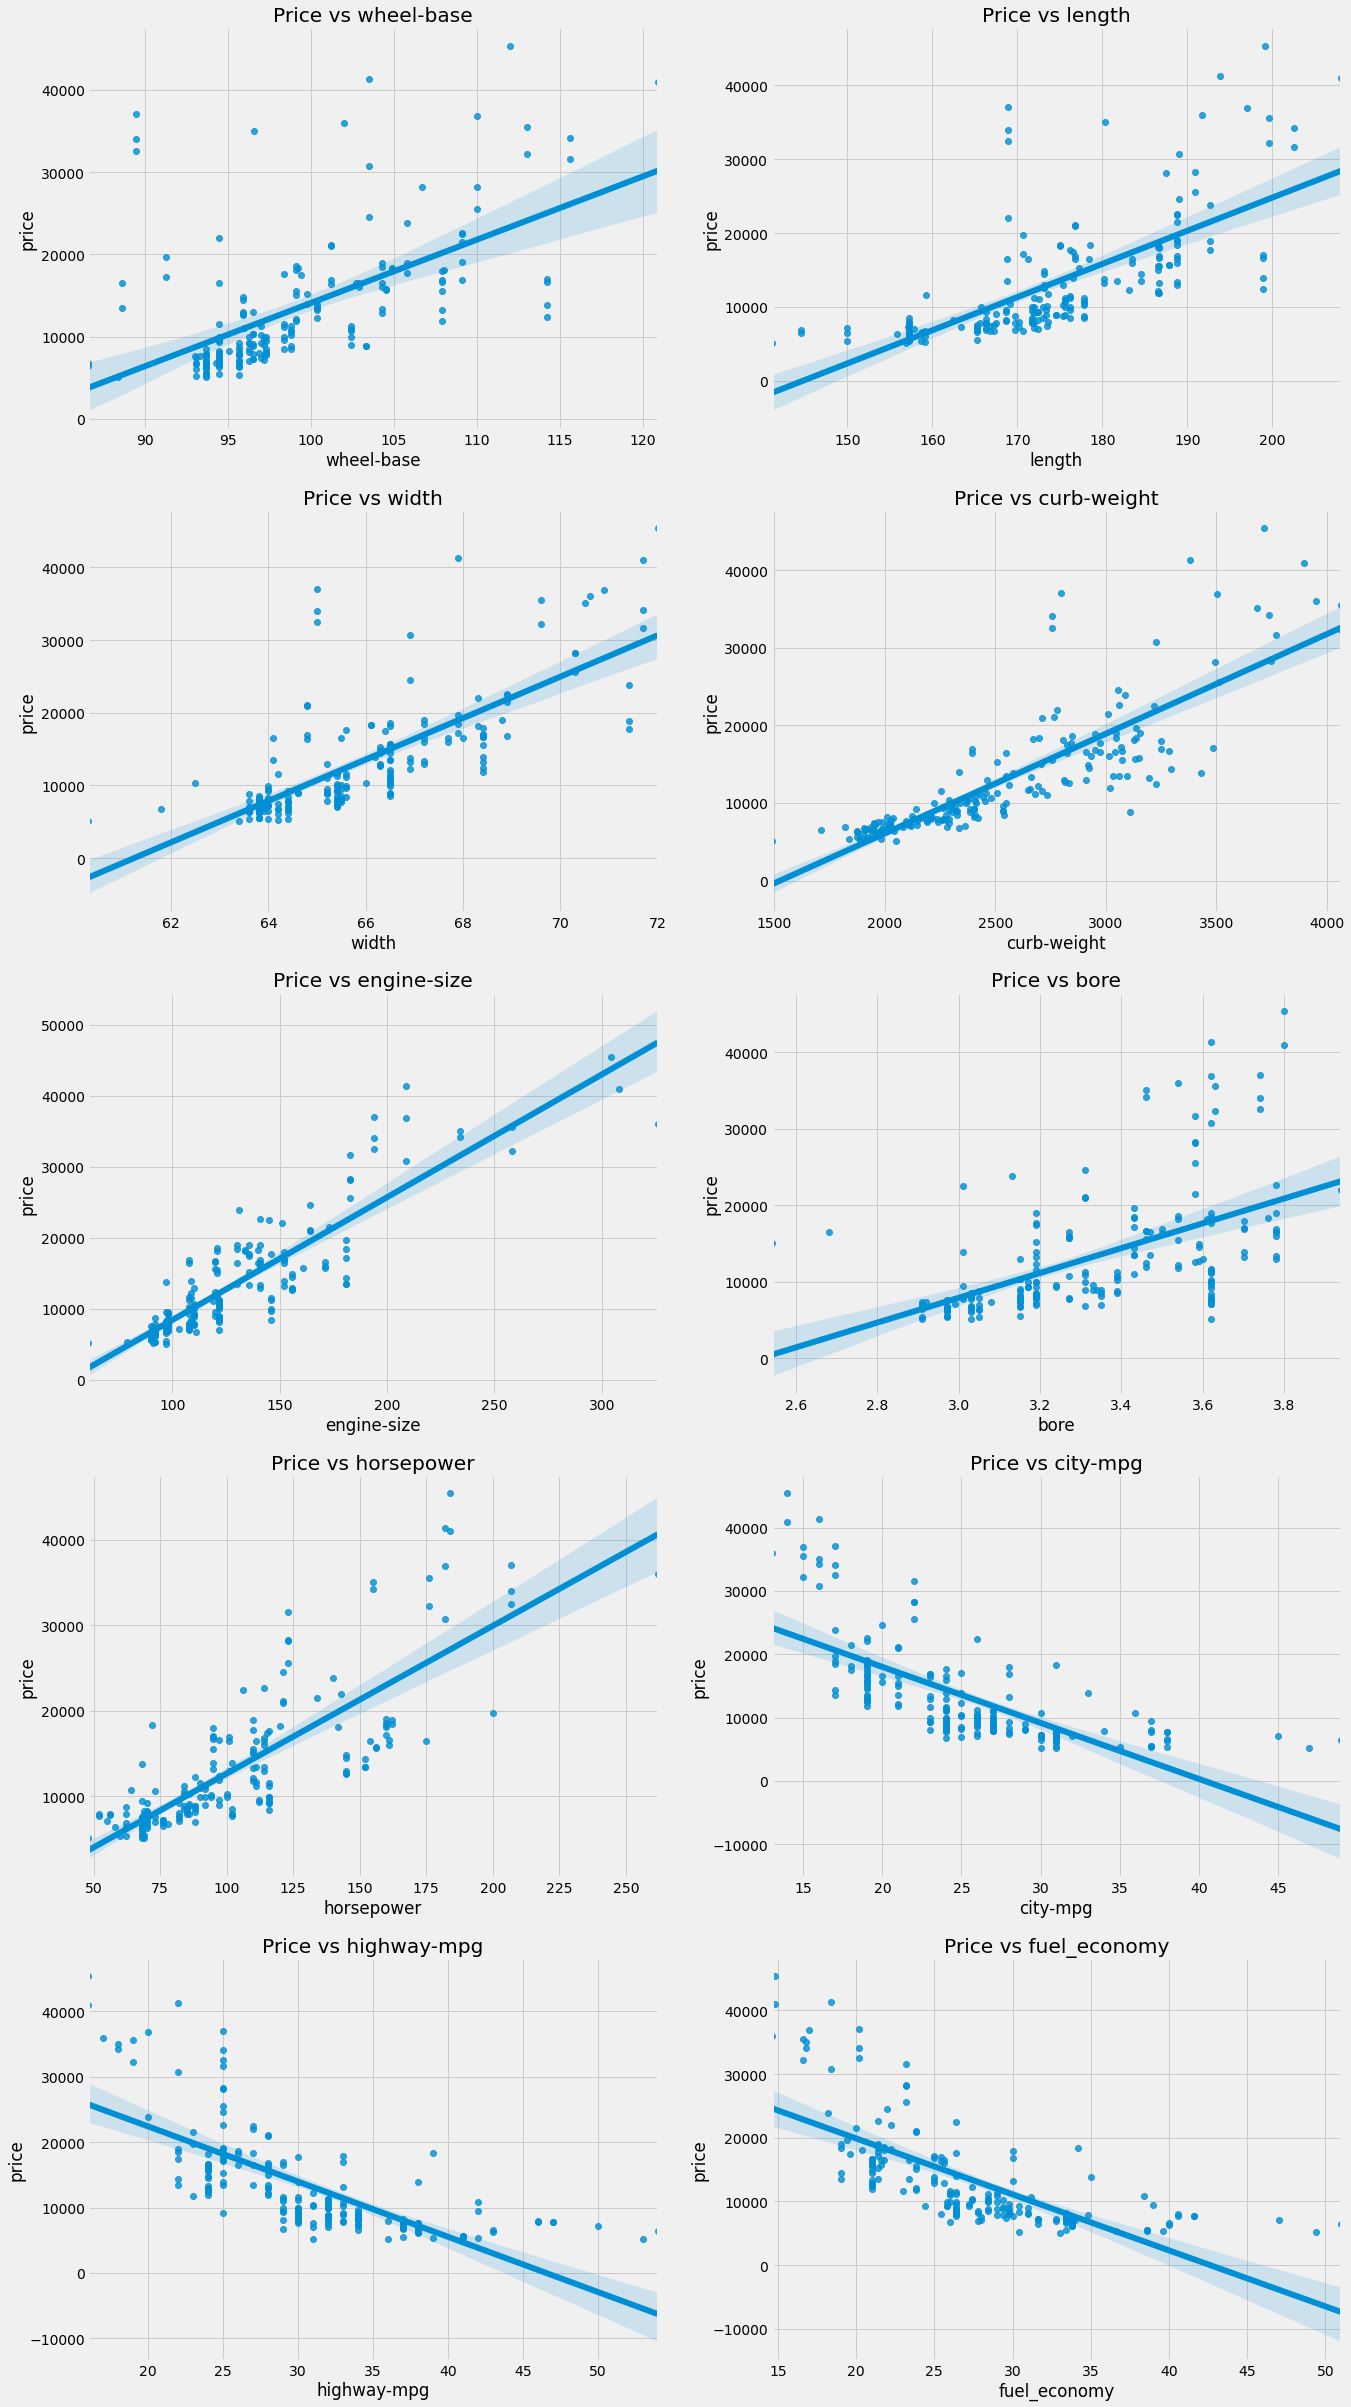

In [43]:
plt.subplots(figsize=(20,40))
i=1
for col in numeric_cols:
    plt.subplot(5,2,i)
    sns.regplot(x=col,y='price',data=numeric_cars)
    plt.title('Price vs '+col)
    i+=1

The following conclusions are drawn from the previos regression plot :
- The wheel base of a vehicle shows **slight positive** correlation with the price. For a certain wheel-base there is a huge band within which the prices of the vehicles lie.
- The **length** and **width** of the vehicle share a linear relationship with the price and are highly positively correlated. This means, the length and width of the vehicle can be a determining charateristic for its price.
- The **curb_weight** has a linear relationship with the price of vehicle. High end vehicles have higher curb weights i.e they are heavier packed vehicles.
- The **engine_size and horsepower** share a **linear relationship** with price. High end vehicles pack a punch when it comes to power of the vehicle.
- The **bore** shows high positive correlation with the price.

From the conclusion we can say that the following columns can be definitors of the price of a vehicle_
- length
- width
- curb_weight
- engine_size
- horsepower
- bore
- wheel_base

After analyzing all the numeric features we conclude that most of the numeric columns share a linear relationship with the price of the vehicle as identified in the previous heatmap and regression plots. 

These charateristics can be good predictors for the target price. The dataset also contains categorical variables. These variables have to be compared against the price to find some relations.

### Target feature relation with categorical features

In [44]:
categorical_columns = []
for column in cars.columns.tolist():
    if column not in continuous_cols:
        categorical_columns.append(column)

In [45]:
cars[categorical_columns]

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo,gas,turbo,sedan,rwd,front,ohc,four,mpfi
202,-1,volvo,gas,std,sedan,rwd,front,ohcv,six,mpfi
203,-1,volvo,diesel,turbo,sedan,rwd,front,ohc,six,idi


In [46]:
cars[categorical_columns].symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

#### Symboling

The symboling column descibes the risk factor invovled with the price of a car. A value of +3 means very risky and -2 means pretty safe. the symbols are first changed to labels as given below then compared with price.

In [47]:
cars['symboling_labels'] = cars.symboling.apply(decode_symboling).astype(
    CategoricalDtype(
        categories=['Very safe','Safe','Neutral','Maybe risky','Risky','Very risky'],
        ordered=True
    )
)

In [48]:
cars[categorical_columns + ["symboling_labels"]]

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling_labels
0,3,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi,Very risky
1,3,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi,Very risky
2,1,alfa-romero,gas,std,hatchback,rwd,front,ohcv,six,mpfi,Maybe risky
3,2,audi,gas,std,sedan,fwd,front,ohc,four,mpfi,Risky
4,2,audi,gas,std,sedan,4wd,front,ohc,five,mpfi,Risky
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,front,ohc,four,mpfi,Safe
201,-1,volvo,gas,turbo,sedan,rwd,front,ohc,four,mpfi,Safe
202,-1,volvo,gas,std,sedan,rwd,front,ohcv,six,mpfi,Safe
203,-1,volvo,diesel,turbo,sedan,rwd,front,ohc,six,idi,Safe


In [49]:
cars["symboling_labels"].value_counts(dropna=False)

Neutral        64
Maybe risky    52
Risky          31
Very risky     23
Safe           22
Very safe       3
Name: symboling_labels, dtype: int64

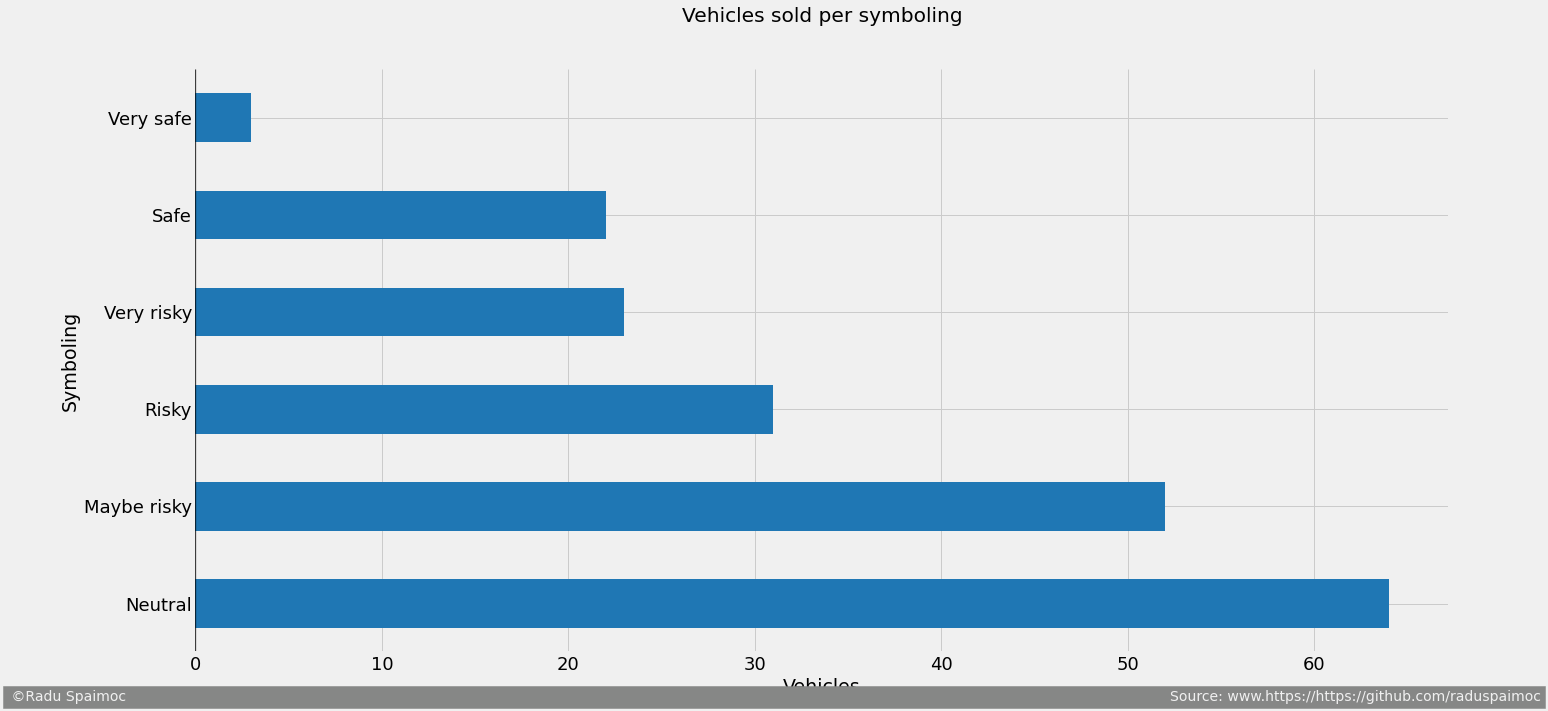

In [50]:
plot_horizontal_bar(cars["symboling_labels"].value_counts(dropna=False), 
                    "Vehicles sold per symboling", 
                    "Vehicles", 
                    "Symboling", 
                    sigbar_x=-10.1, 
                    sigbar_y=-1,
                    with_sort=False)

In [51]:
cars["clean_price"] = numeric_cars.price

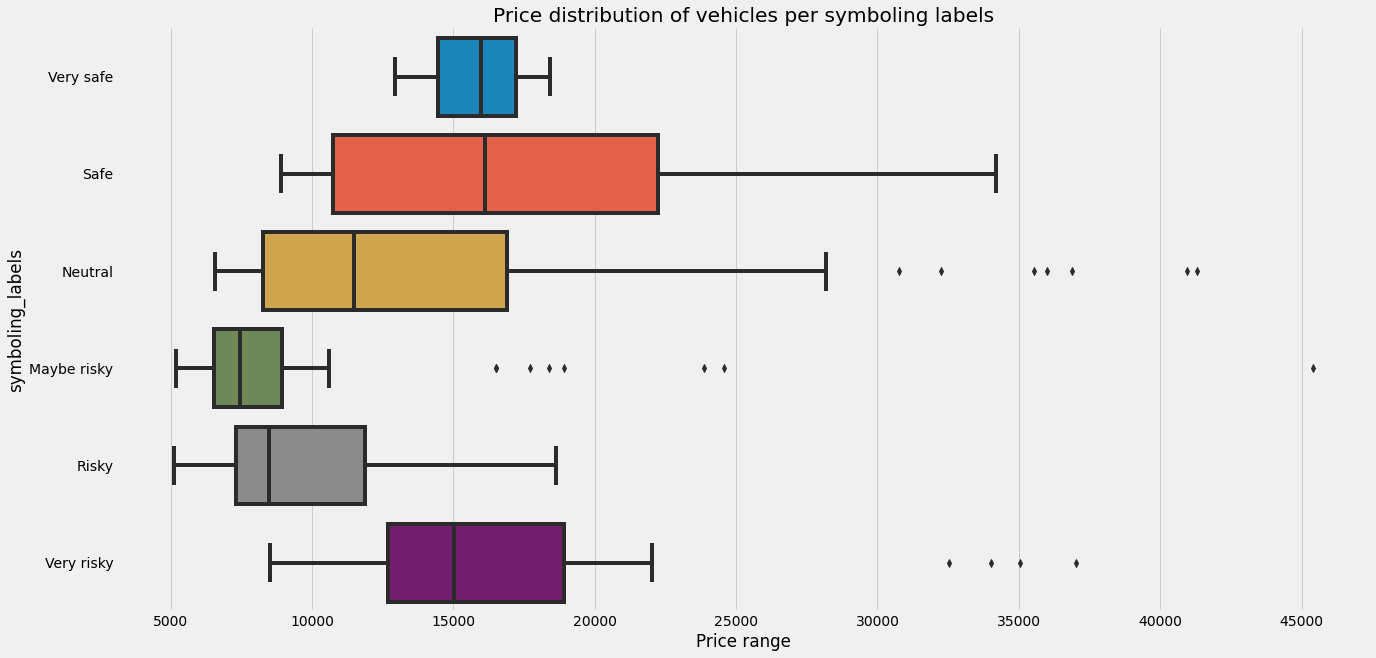

In [52]:
box_plot(cars[["clean_price", "symboling_labels"]], 
          "clean_price", 
         'Price distribution of vehicles per symboling labels', 
         'Price range',
         multiple=True, 
         ycolumn="symboling_labels"
        )

The symboling plots suggest :
- The vehicles with a symbol rating of **0 - Neutral**, are maximum sold.
- Vehicles with a symbol rating of **-1 - Safe have higher** prices.

#### Make and body type

The make of a vehicle identifies the manufacturer of the vehicle and body_style identifies the type of vehicle as discussed previously. The two bar plots below show the number of vehicles sold per maker and per body type.

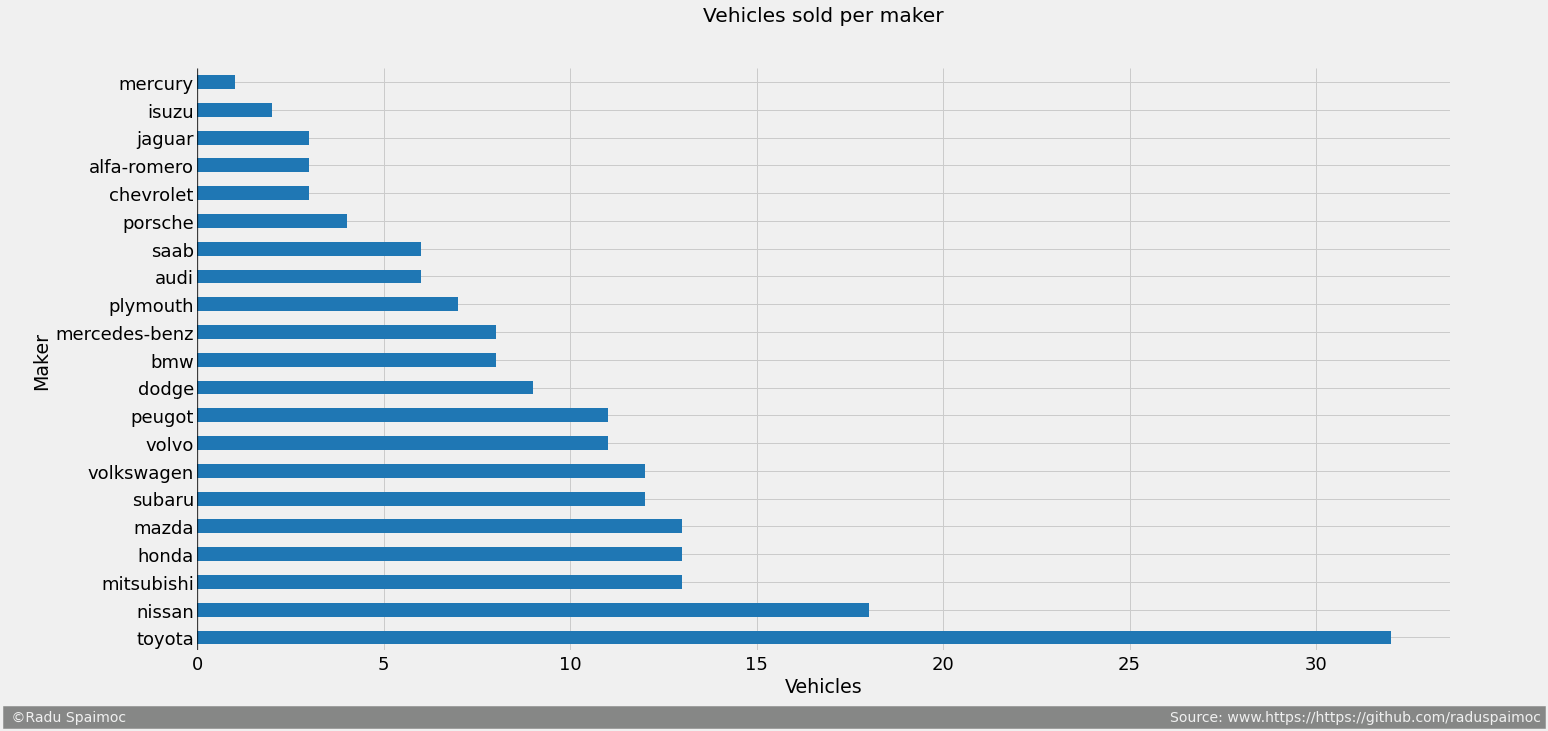

In [53]:
plot_horizontal_bar(cars["make"].value_counts(dropna=False), 
                    "Vehicles sold per maker", 
                    "Vehicles", 
                    "Maker", 
                    sigbar_x=-5.1, 
                    sigbar_y=-3,
                    with_sort=False)

From the previous plot we can conclude that **toyota** is the most sold vehicle in the dataset.

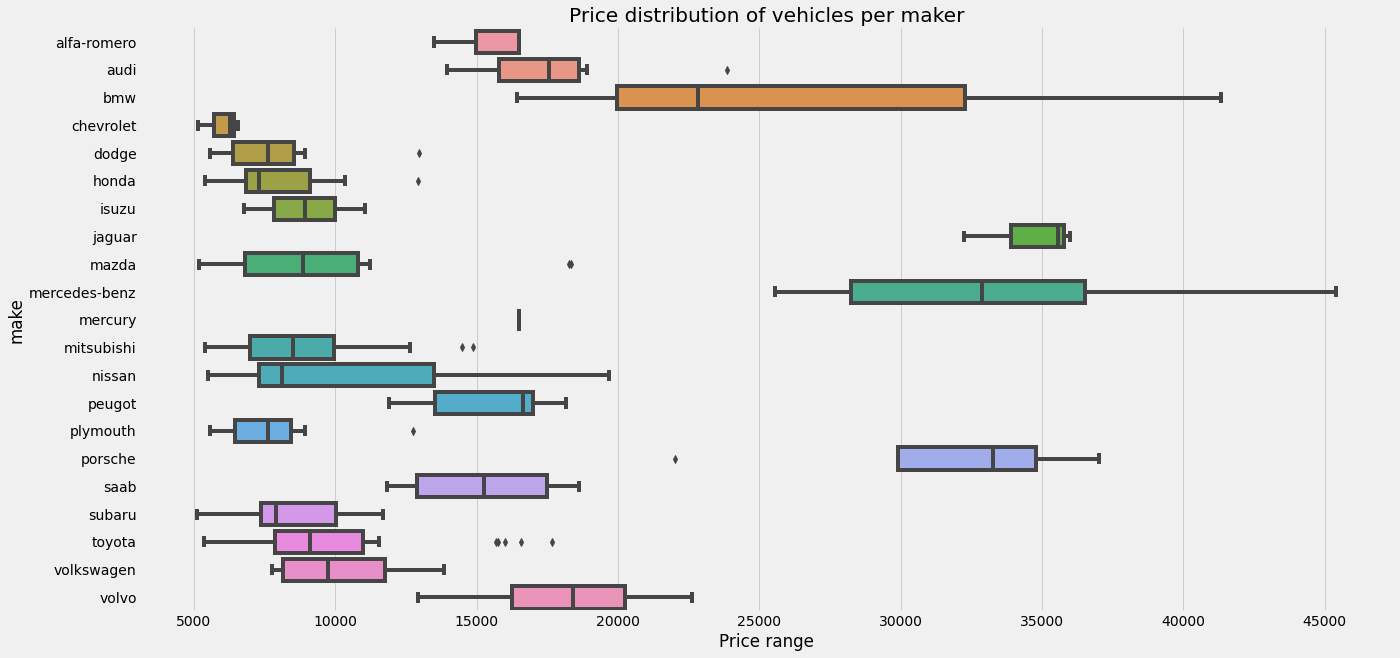

In [54]:
box_plot(cars[["clean_price", "make"]], 
          "clean_price", 
         'Price distribution of vehicles per maker', 
         'Price range',
         multiple=True, 
         ycolumn="make"
        )

Manufacturers sell cars for different price ranges i.e. usually they have cars for lower range, mediocre range and higher range, at a simple view the manufacturers can't be used to predict a price car.

But, in case of the manufacturers **Porsche, mercedez-benz and jaguar** seems to have only higher range vehicles (with one exception in case of porsche). **BMW** case is more complez as it has a very high distributed price range.

We will create an indicator in case of cars with higher price than **25k** and not **BMW** for high range makers.

In [55]:
cars["high_range_manufacturer"]=0
cars.loc[(cars["clean_price"]>=25000) & (cars.make!="bmw"), "high_range_manufacturer"] = 1
numeric_cars["high_range_manufacturer"] = cars["high_range_manufacturer"]

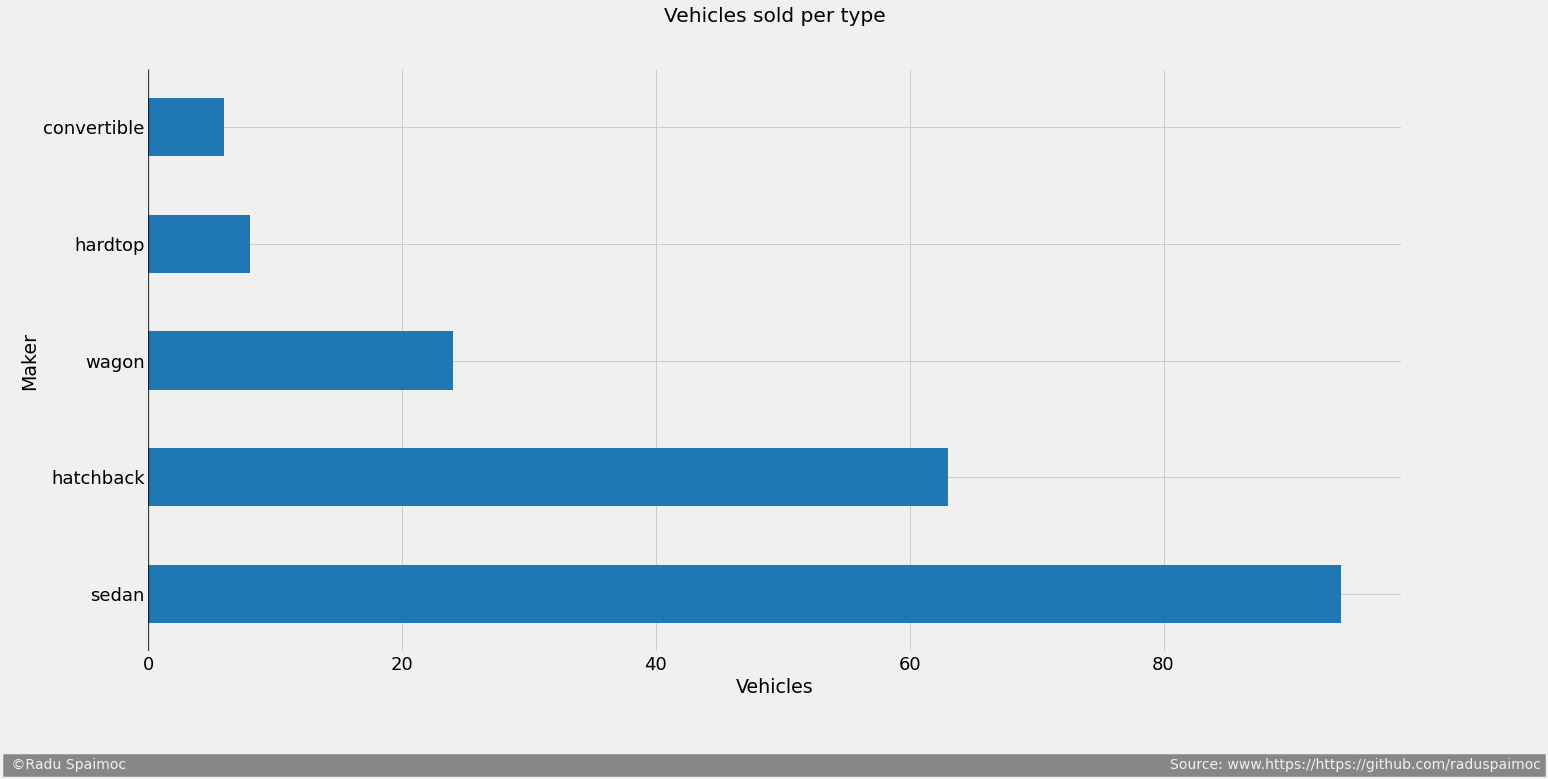

In [56]:
plot_horizontal_bar(cars["body-style"].value_counts(dropna=False), 
                    "Vehicles sold per type", 
                    "Vehicles", 
                    "Maker", 
                    sigbar_x=-11.1, 
                    sigbar_y=-1.5,
                    with_sort=False)

From the previous plot we can conclude that **sedan** body type is the most sold vehicle type in the dataset.

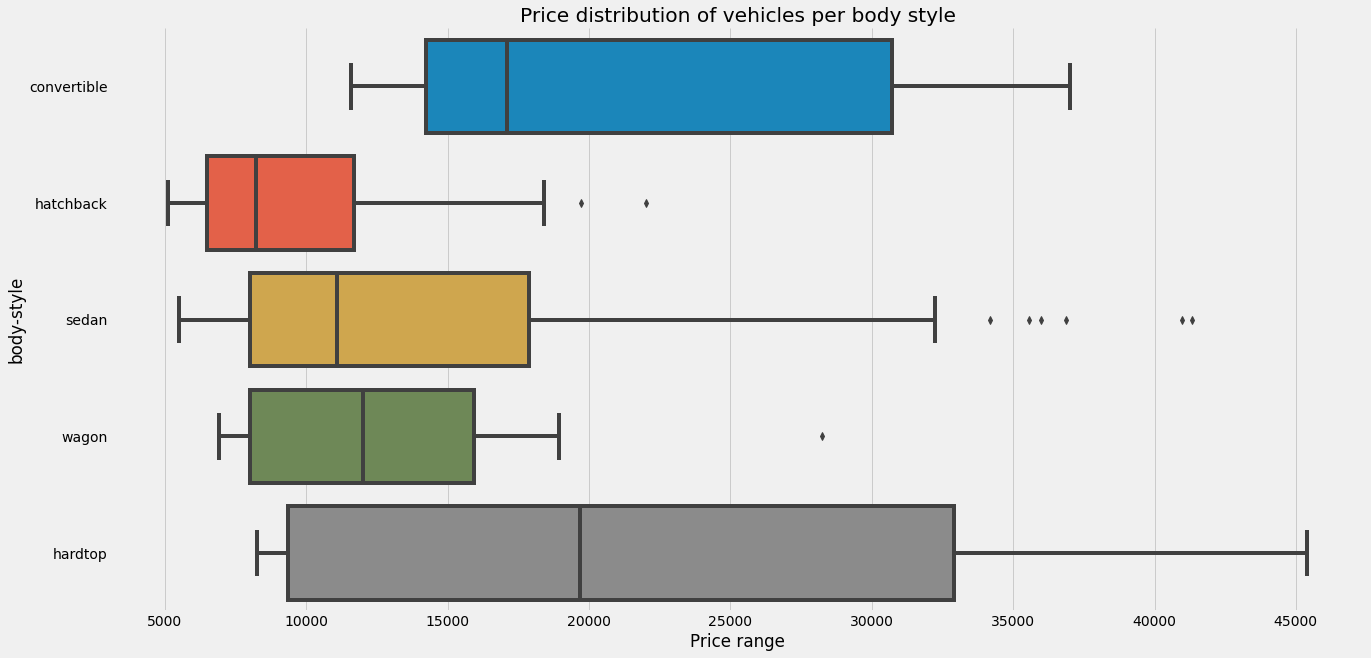

In [57]:
box_plot(cars[["clean_price", "body-style"]], 
          "clean_price", 
         'Price distribution of vehicles per body style', 
         'Price range',
         multiple=True, 
         ycolumn="body-style"
        )

Hardtop and convertibles have the highest average price ranges.

Every body style has vehicles of different price ranges for example, hardtops and convertibles are in high end vehicles whereas sedans and wagons are in moderate price ranges. Hatchbacks are in the lowest price range.

#### Fuel type, aspiration, engine location and drive wheels

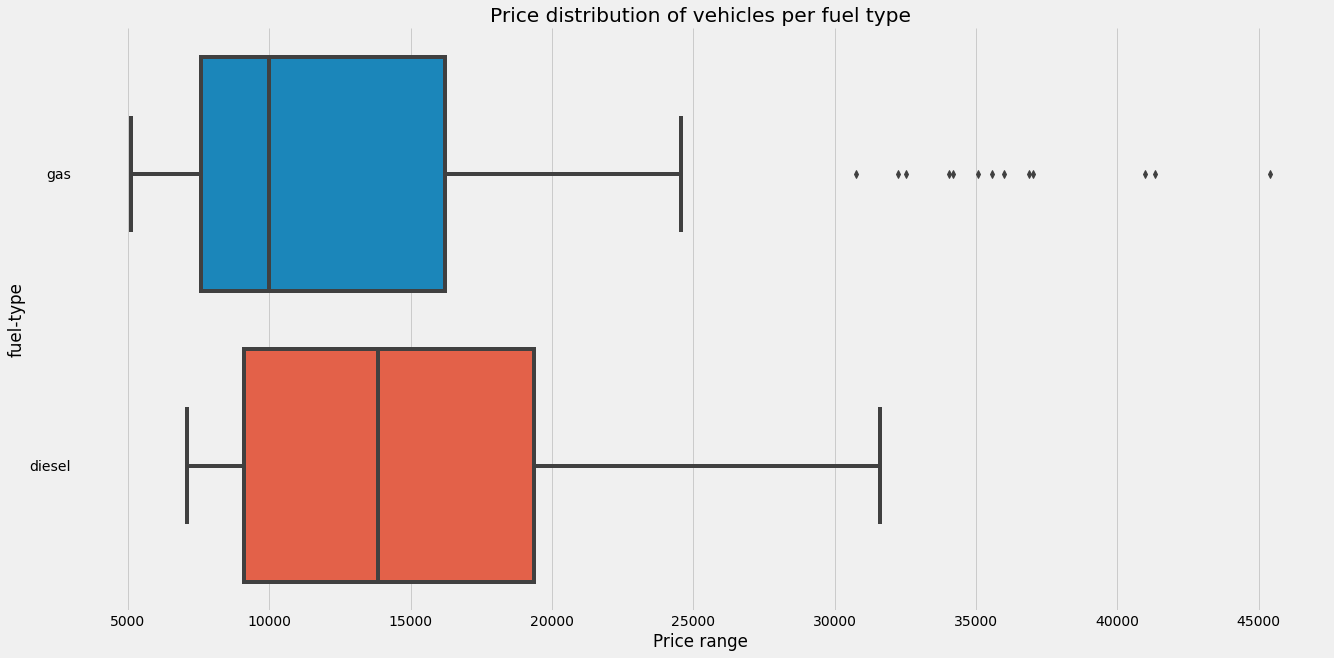

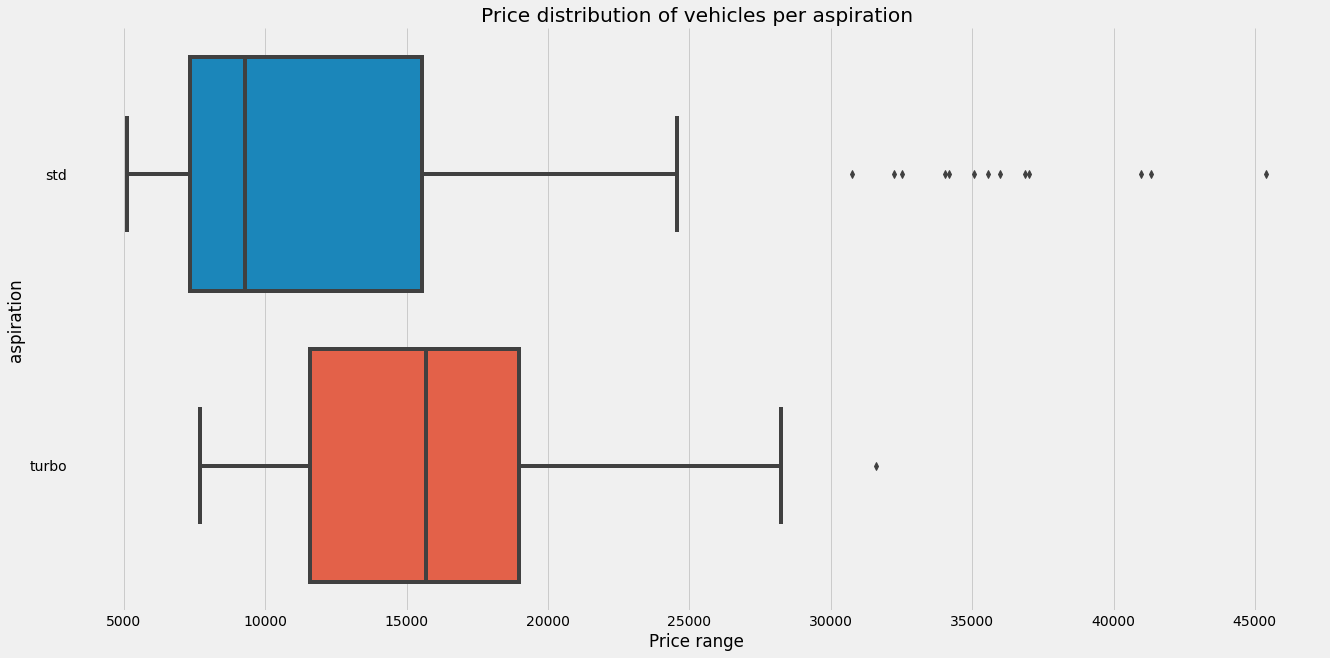

In [58]:
box_plot(cars[["clean_price", "fuel-type"]], "clean_price", 'Price distribution of vehicles per fuel type', 
         'Price range', multiple=True,  ycolumn="fuel-type")

box_plot(cars[["clean_price", "aspiration"]], "clean_price", 'Price distribution of vehicles per aspiration', 
         'Price range', multiple=True,  ycolumn="aspiration")

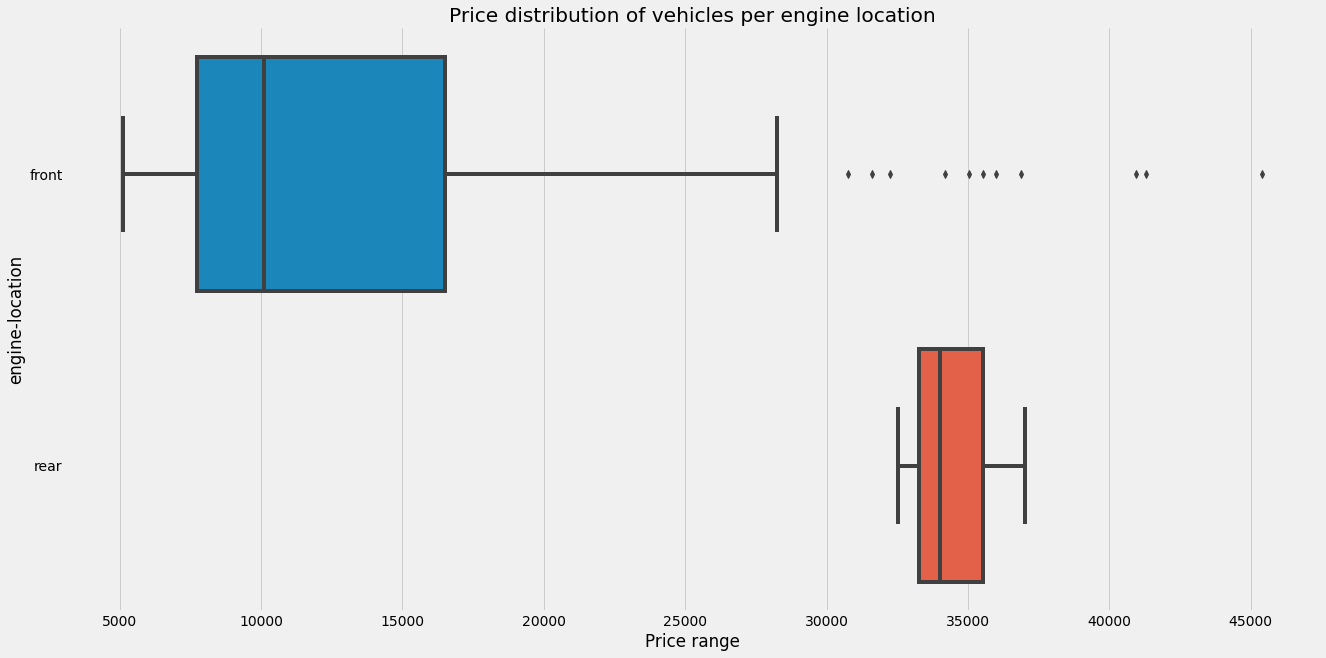

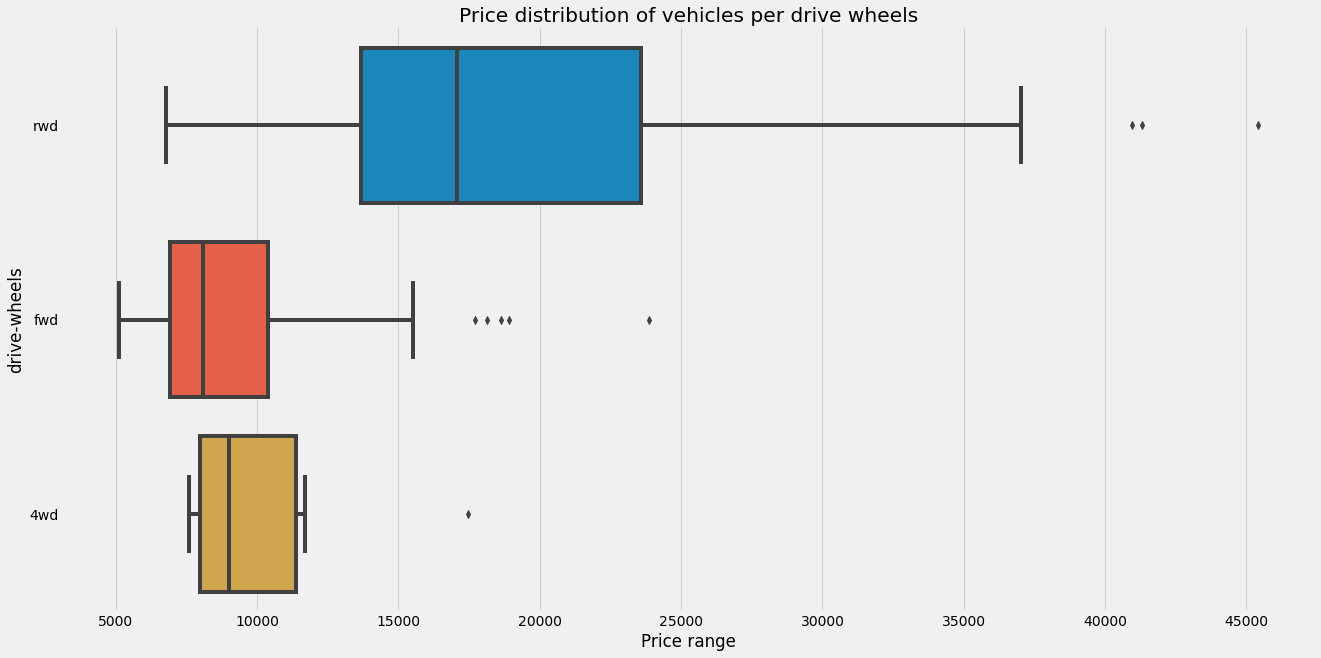

In [59]:
box_plot(cars[["clean_price", "engine-location"]], "clean_price", 'Price distribution of vehicles per engine location', 
         'Price range', multiple=True,  ycolumn="engine-location")

box_plot(cars[["clean_price", "drive-wheels"]], "clean_price", 'Price distribution of vehicles per drive wheels', 
         'Price range', multiple=True,  ycolumn="drive-wheels")

The columns **fuel_type, aspiration and engine_location** are two-category variables describing the latent features of the vehicle.

The conclusions drawn:

- Most vehicles have engines in the front except a very few. The very few that have engines at the rear have very high price points. A few of the high end vehicles can be said to have rear engines.
- Turbo engine vehicles are higher priced than standard engine vehicles.
- Disel vehicles are priced higher than gas vehicles, but gas vehicles are most sold.
- The rear wheel drive vehicles are ranged at higher price points.

Out of the above characteristics, aspiration, drive_wheels and fuel_type seem like good predictors for the price of the vehicle. The engine_location though showing distinct price gap, has too few representatives for rear category.

#### Engine type

The engine_type describes the build of the engine from the manufacturer.

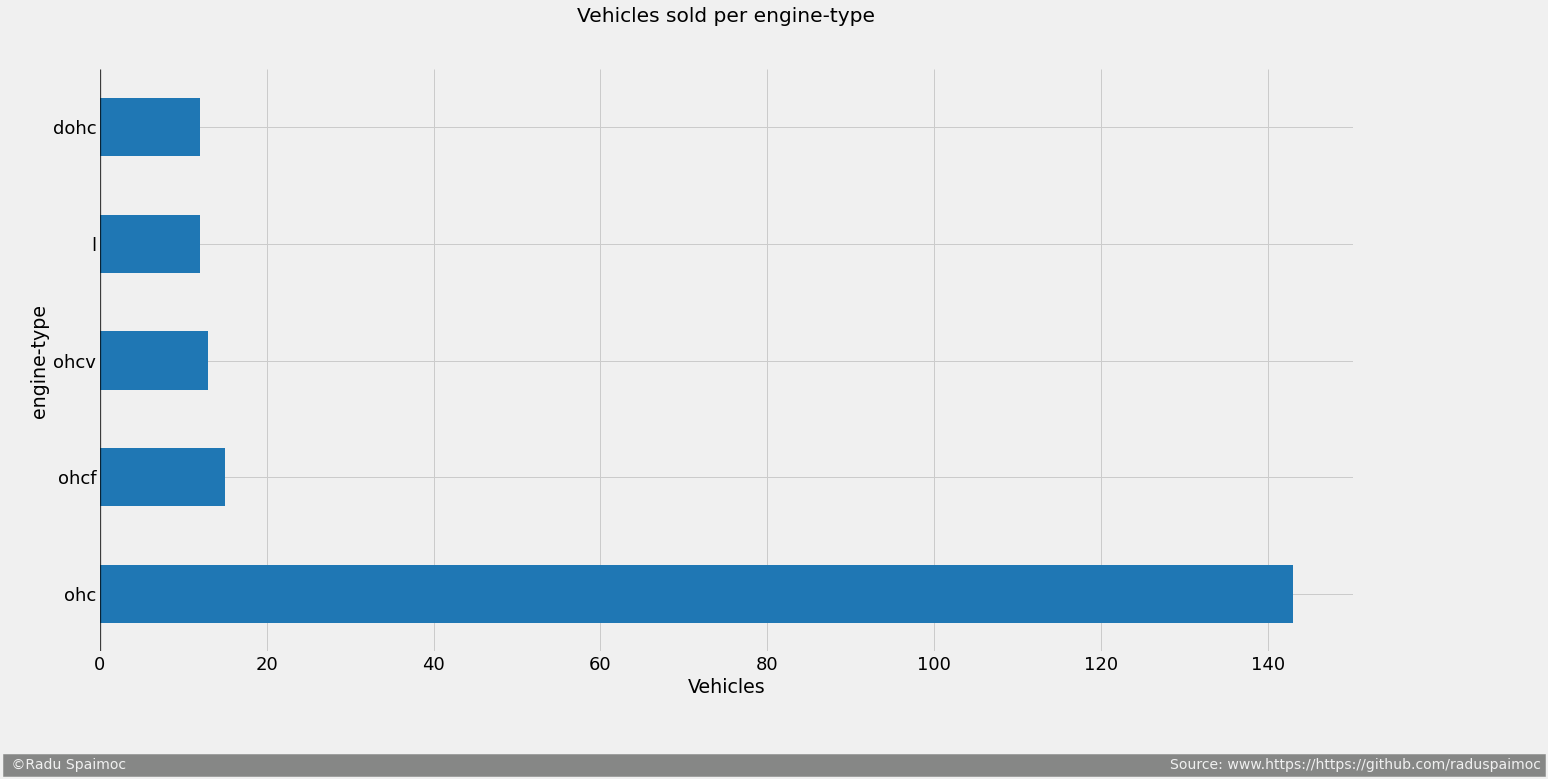

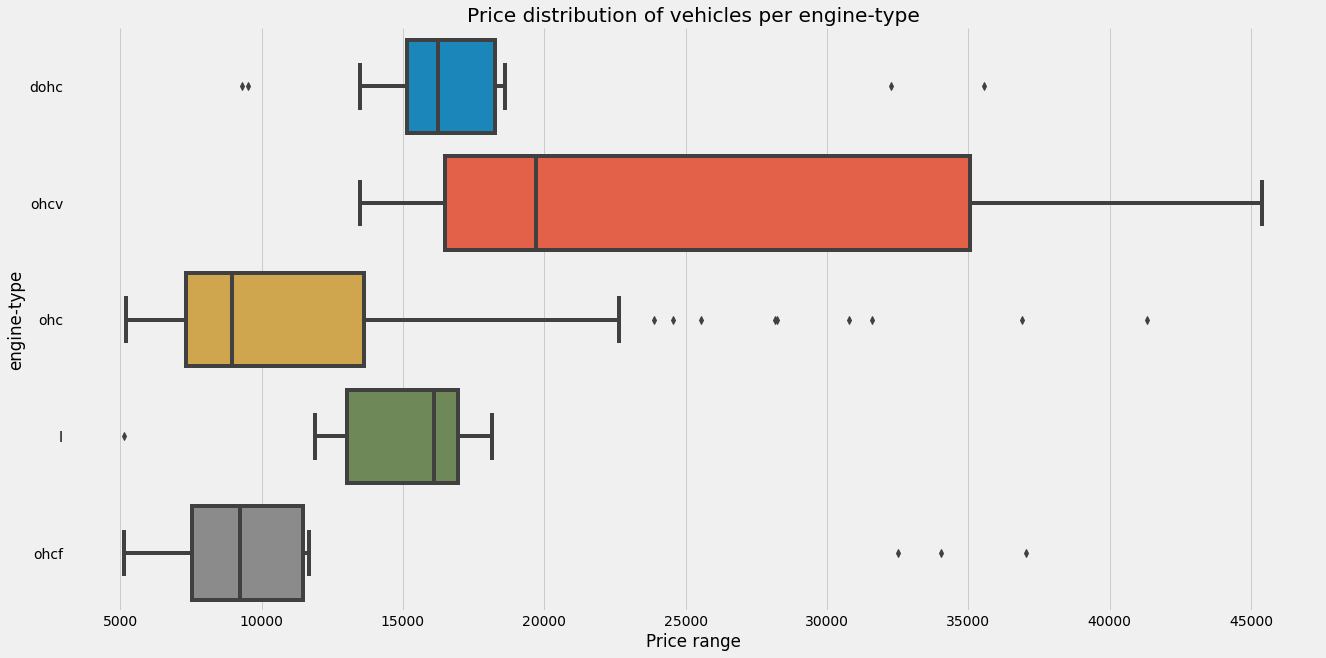

In [60]:
plot_horizontal_bar(cars["engine-type"].value_counts(dropna=False), 
                    "Vehicles sold per engine-type", 
                    "Vehicles", 
                    "engine-type", 
                    sigbar_x=-11.1, 
                    sigbar_y=-1.5,
                    with_sort=False)

box_plot(cars[["clean_price", "engine-type"]], "clean_price", 'Price distribution of vehicles per engine-type', 
         'Price range', multiple=True,  ycolumn="engine-type")

The plots conclude that **engine type** can determine the average price range of the vehicle and hence makes it an important charateristic for the prediction of the price.

- Vehicles with ohc engine type are most sold, but they have the least average price. Thus vehicles with ohc engine type have lesser price points and are most sold.
- Vehicles with the ohcv engine type are priced costlier than the rest.


#### Num of cylinders

The final categorical column, **num_of_cylinders** is an important parameter for an engine and determeines the power of the engine. The plots below visualize the number of vehicles sold per number of cylinders and the average price range of the vehicles sold per number of cylinders.

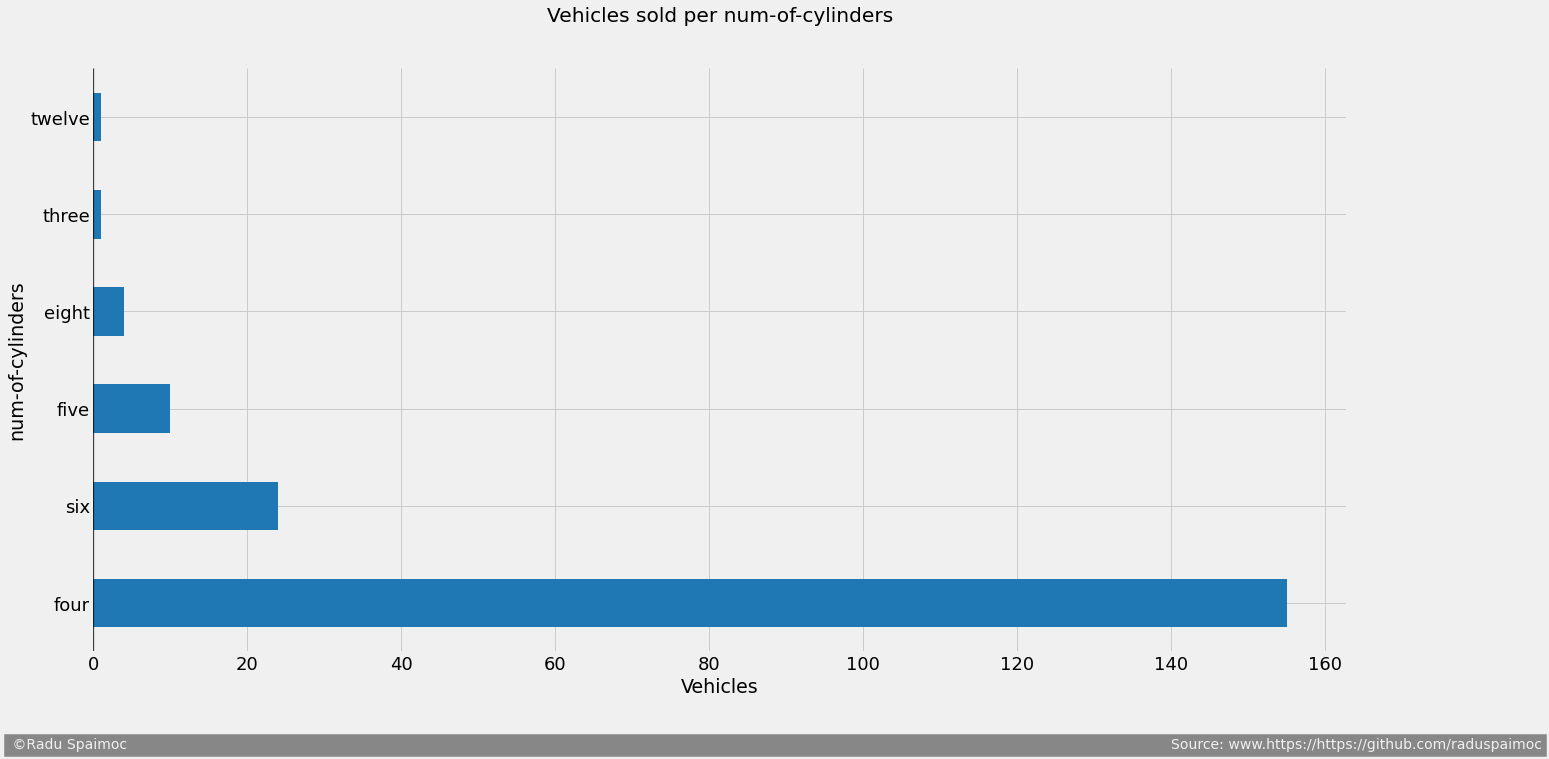

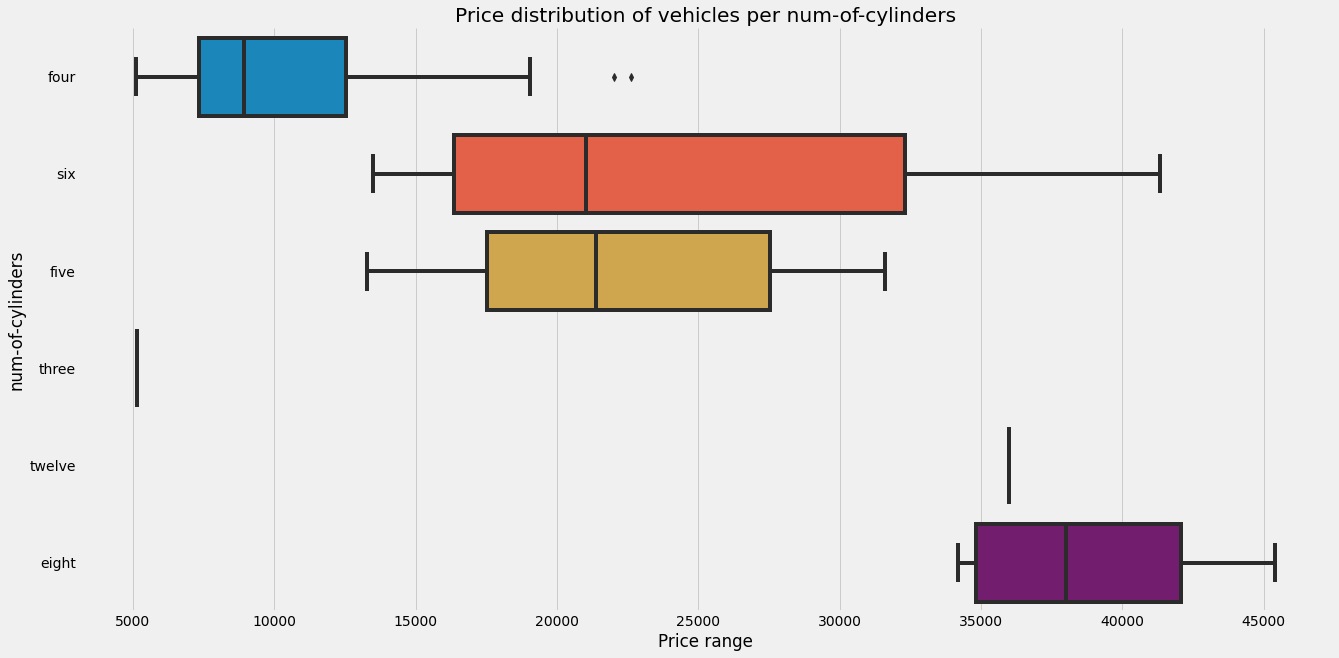

In [61]:
plot_horizontal_bar(cars["num-of-cylinders"].value_counts(dropna=False), 
                    "Vehicles sold per num-of-cylinders", 
                    "Vehicles", 
                    "num-of-cylinders", 
                    sigbar_x=-11.1, 
                    sigbar_y=-1.5,
                    with_sort=False)

box_plot(cars[["clean_price", "num-of-cylinders"]], "clean_price", 'Price distribution of vehicles per num-of-cylinders', 
         'Price range', multiple=True,  ycolumn="num-of-cylinders")

Vechiles with **four** cylinder engine were sold the most and have a **moderate** price range.

High end vehicles boast a **twelve or eight** cylinder engine, but the total number of vehicles is considerable inferior.

#### Analysis conclusions

Based on the exploratory analysis. We can confirm that the following columns are low correlated features with the **price** column which is the target variable, so they are considered to be bad predictors for the presented problem.
- normalized-loses
- height
- stroke
- compression-rate
- peak-rpm
- num-of-doors

After analyzing the numerical features we can say that the following can be good definitors of the price of the vehicle:
- length
- width
- curb_weight
- engine_size
- horsepower
- bore
- wheel_base
- fuel_economy (created variable combining city and highway mpg)

After analyzing the categorical features, the best defintors in the presented dataset can be:
- high_range_manufacturer (created indicator)
- fuel-type
- aspiration
- drive-wheels
- engine-type
- num-of-cylinders

# Data normalization

Now all the columns except the target will be normalized in a range of 0 to 1. But, first all the categorical variables are converted to binary dummy variables using `pd.get_dummies`. 

In [62]:
numeric_cars[[
 'length',
 'width', 
 'curb-weight',
 'engine-size',
 'bore', 
 'horsepower',  
 'fuel_economy',
 'high_range_manufacturer',
 'price',]]

,length,width,curb-weight,engine-size,bore,horsepower,fuel_economy,high_range_manufacturer,price
0,168.8,64.1,2548.0,130.0,3.47,111.0,23.4,0,13495.0
1,168.8,64.1,2548.0,130.0,3.47,111.0,23.4,0,16500.0
2,171.2,65.5,2823.0,152.0,2.68,154.0,21.8,0,16500.0
3,176.6,66.2,2337.0,109.0,3.19,102.0,26.4,0,13950.0
4,176.6,66.4,2824.0,136.0,3.19,115.0,19.6,0,17450.0
...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952.0,141.0,3.78,114.0,25.0,0,16845.0
201,188.8,68.8,3049.0,141.0,3.78,160.0,21.4,0,19045.0
202,188.8,68.9,3012.0,173.0,3.58,134.0,20.0,0,21485.0
203,188.8,68.9,3217.0,145.0,3.01,106.0,26.4,0,22470.0


In [63]:
numeric_cars[[
 'length',
 'width', 
 'curb-weight',
 'engine-size',
 'bore', 
 'horsepower',  
 'fuel_economy',
 'high_range_manufacturer',
 'price',]].isnull().sum()

length                     0
width                      0
curb-weight                0
engine-size                0
bore                       0
horsepower                 0
fuel_economy               0
high_range_manufacturer    0
price                      0
dtype: int64

In [64]:
cars.isnull().sum()

symboling                   0
normalized-losses          35
make                        0
fuel-type                   0
aspiration                  0
num-of-doors                0
body-style                  0
drive-wheels                0
engine-location             0
wheel-base                  0
length                      0
width                       0
height                      0
curb-weight                 0
engine-type                 0
num-of-cylinders            0
engine-size                 0
fuel-system                 0
bore                        0
stroke                      0
compression-rate            0
horsepower                  0
peak-rpm                    0
city-mpg                    0
highway-mpg                 0
price                       0
symboling_labels            0
clean_price                 0
high_range_manufacturer     0
dtype: int64

In [65]:
aux = pd.get_dummies(cars[["high_range_manufacturer", "fuel-type", "aspiration", "drive-wheels", "engine-type", "num-of-cylinders"]])

In [66]:
aux

,high_range_manufacturer,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve
0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
201,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
202,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
203,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [67]:
aux.isnull().sum()

high_range_manufacturer    0
fuel-type_diesel           0
fuel-type_gas              0
aspiration_std             0
aspiration_turbo           0
drive-wheels_4wd           0
drive-wheels_fwd           0
drive-wheels_rwd           0
engine-type_dohc           0
engine-type_l              0
engine-type_ohc            0
engine-type_ohcf           0
engine-type_ohcv           0
num-of-cylinders_eight     0
num-of-cylinders_five      0
num-of-cylinders_four      0
num-of-cylinders_six       0
num-of-cylinders_three     0
num-of-cylinders_twelve    0
dtype: int64

In [68]:
numeric_cars = pd.concat([numeric_cars[[
 'length',
 'width', 
 'curb-weight',
 'engine-size',
 'bore', 
 'horsepower',  
 'fuel_economy',
 'high_range_manufacturer',
 'price',]], aux], axis=1)

In [69]:
x = numeric_cars.drop('price', axis=1)
y = numeric_cars.price

scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [70]:
normalized_df = pd.DataFrame(scaled, columns=x.columns.tolist())
normalized_df["price"] = y

In [71]:
normalized_df

,length,width,curb-weight,engine-size,bore,horsepower,fuel_economy,high_range_manufacturer,high_range_manufacturer,fuel-type_diesel,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,price
0,-0.438504,-0.839749,-0.021018,0.049883,0.518555,0.204599,-0.639027,-0.278115,-0.278115,-0.338062,...,-1.658312,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,13495.0
1,-0.438504,-0.839749,-0.021018,0.049883,0.518555,0.204599,-0.639027,-0.278115,-0.278115,-0.338062,...,-1.658312,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,16500.0
2,-0.245646,-0.181548,0.504425,0.582216,-2.394771,1.342993,-0.884745,-0.278115,-0.278115,-0.338062,...,-1.658312,-0.288675,3.741657,-0.144715,-0.232495,-1.968502,2.669270,-0.071796,-0.071796,16500.0
3,0.188283,0.147553,-0.424175,-0.458253,-0.514016,-0.033670,-0.178304,-0.278115,-0.278115,-0.338062,...,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,13950.0
4,0.188283,0.241582,0.506335,0.195065,-0.514016,0.310496,-1.222609,-0.278115,-0.278115,-0.338062,...,0.603023,-0.288675,-0.267261,-0.144715,4.301163,-1.968502,-0.374634,-0.071796,-0.071796,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.168643,1.416941,0.750905,0.316049,1.661759,0.284022,-0.393308,-0.278115,-0.278115,-0.338062,...,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,9980.0
191,1.168643,1.369927,0.936243,0.316049,1.661759,1.501839,-0.946175,-0.278115,-0.278115,-0.338062,...,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796,13295.0
192,1.168643,1.416941,0.865547,1.090351,0.924208,0.813507,-1.161179,-0.278115,-0.278115,-0.338062,...,-1.658312,-0.288675,3.741657,-0.144715,-0.232495,-1.968502,2.669270,-0.071796,-0.071796,13845.0
193,1.168643,1.416941,1.257240,0.412837,-1.177812,0.072227,-0.178304,-0.278115,-0.278115,2.958040,...,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,-1.968502,2.669270,-0.071796,-0.071796,12290.0


In [72]:
normalized_df.isnull().sum()

length                      0
width                       0
curb-weight                 0
engine-size                 0
bore                        0
horsepower                  0
fuel_economy                0
high_range_manufacturer     0
high_range_manufacturer     0
fuel-type_diesel            0
fuel-type_gas               0
aspiration_std              0
aspiration_turbo            0
drive-wheels_4wd            0
drive-wheels_fwd            0
drive-wheels_rwd            0
engine-type_dohc            0
engine-type_l               0
engine-type_ohc             0
engine-type_ohcf            0
engine-type_ohcv            0
num-of-cylinders_eight      0
num-of-cylinders_five       0
num-of-cylinders_four       0
num-of-cylinders_six        0
num-of-cylinders_three      0
num-of-cylinders_twelve     0
price                      10
dtype: int64

In [73]:
normalized_df.dropna(inplace=True)

# Regression models

## Unvariate KNN

In [74]:
cols = normalized_df.columns.tolist()[:-1] 

In [75]:
k_values = [1, 3, 5, 7, 9, 11]
rmse_results = []
rmse_dic = {}
finale_rmses = {}

for k in k_values:
    for col in cols:
        result = knn_train_test([col], 'price', normalized_df, n_neighbors=k)    
        rmse_results.append(result)
        rmse_dic[col] = result
    finale_rmses[k] = rmse_dic

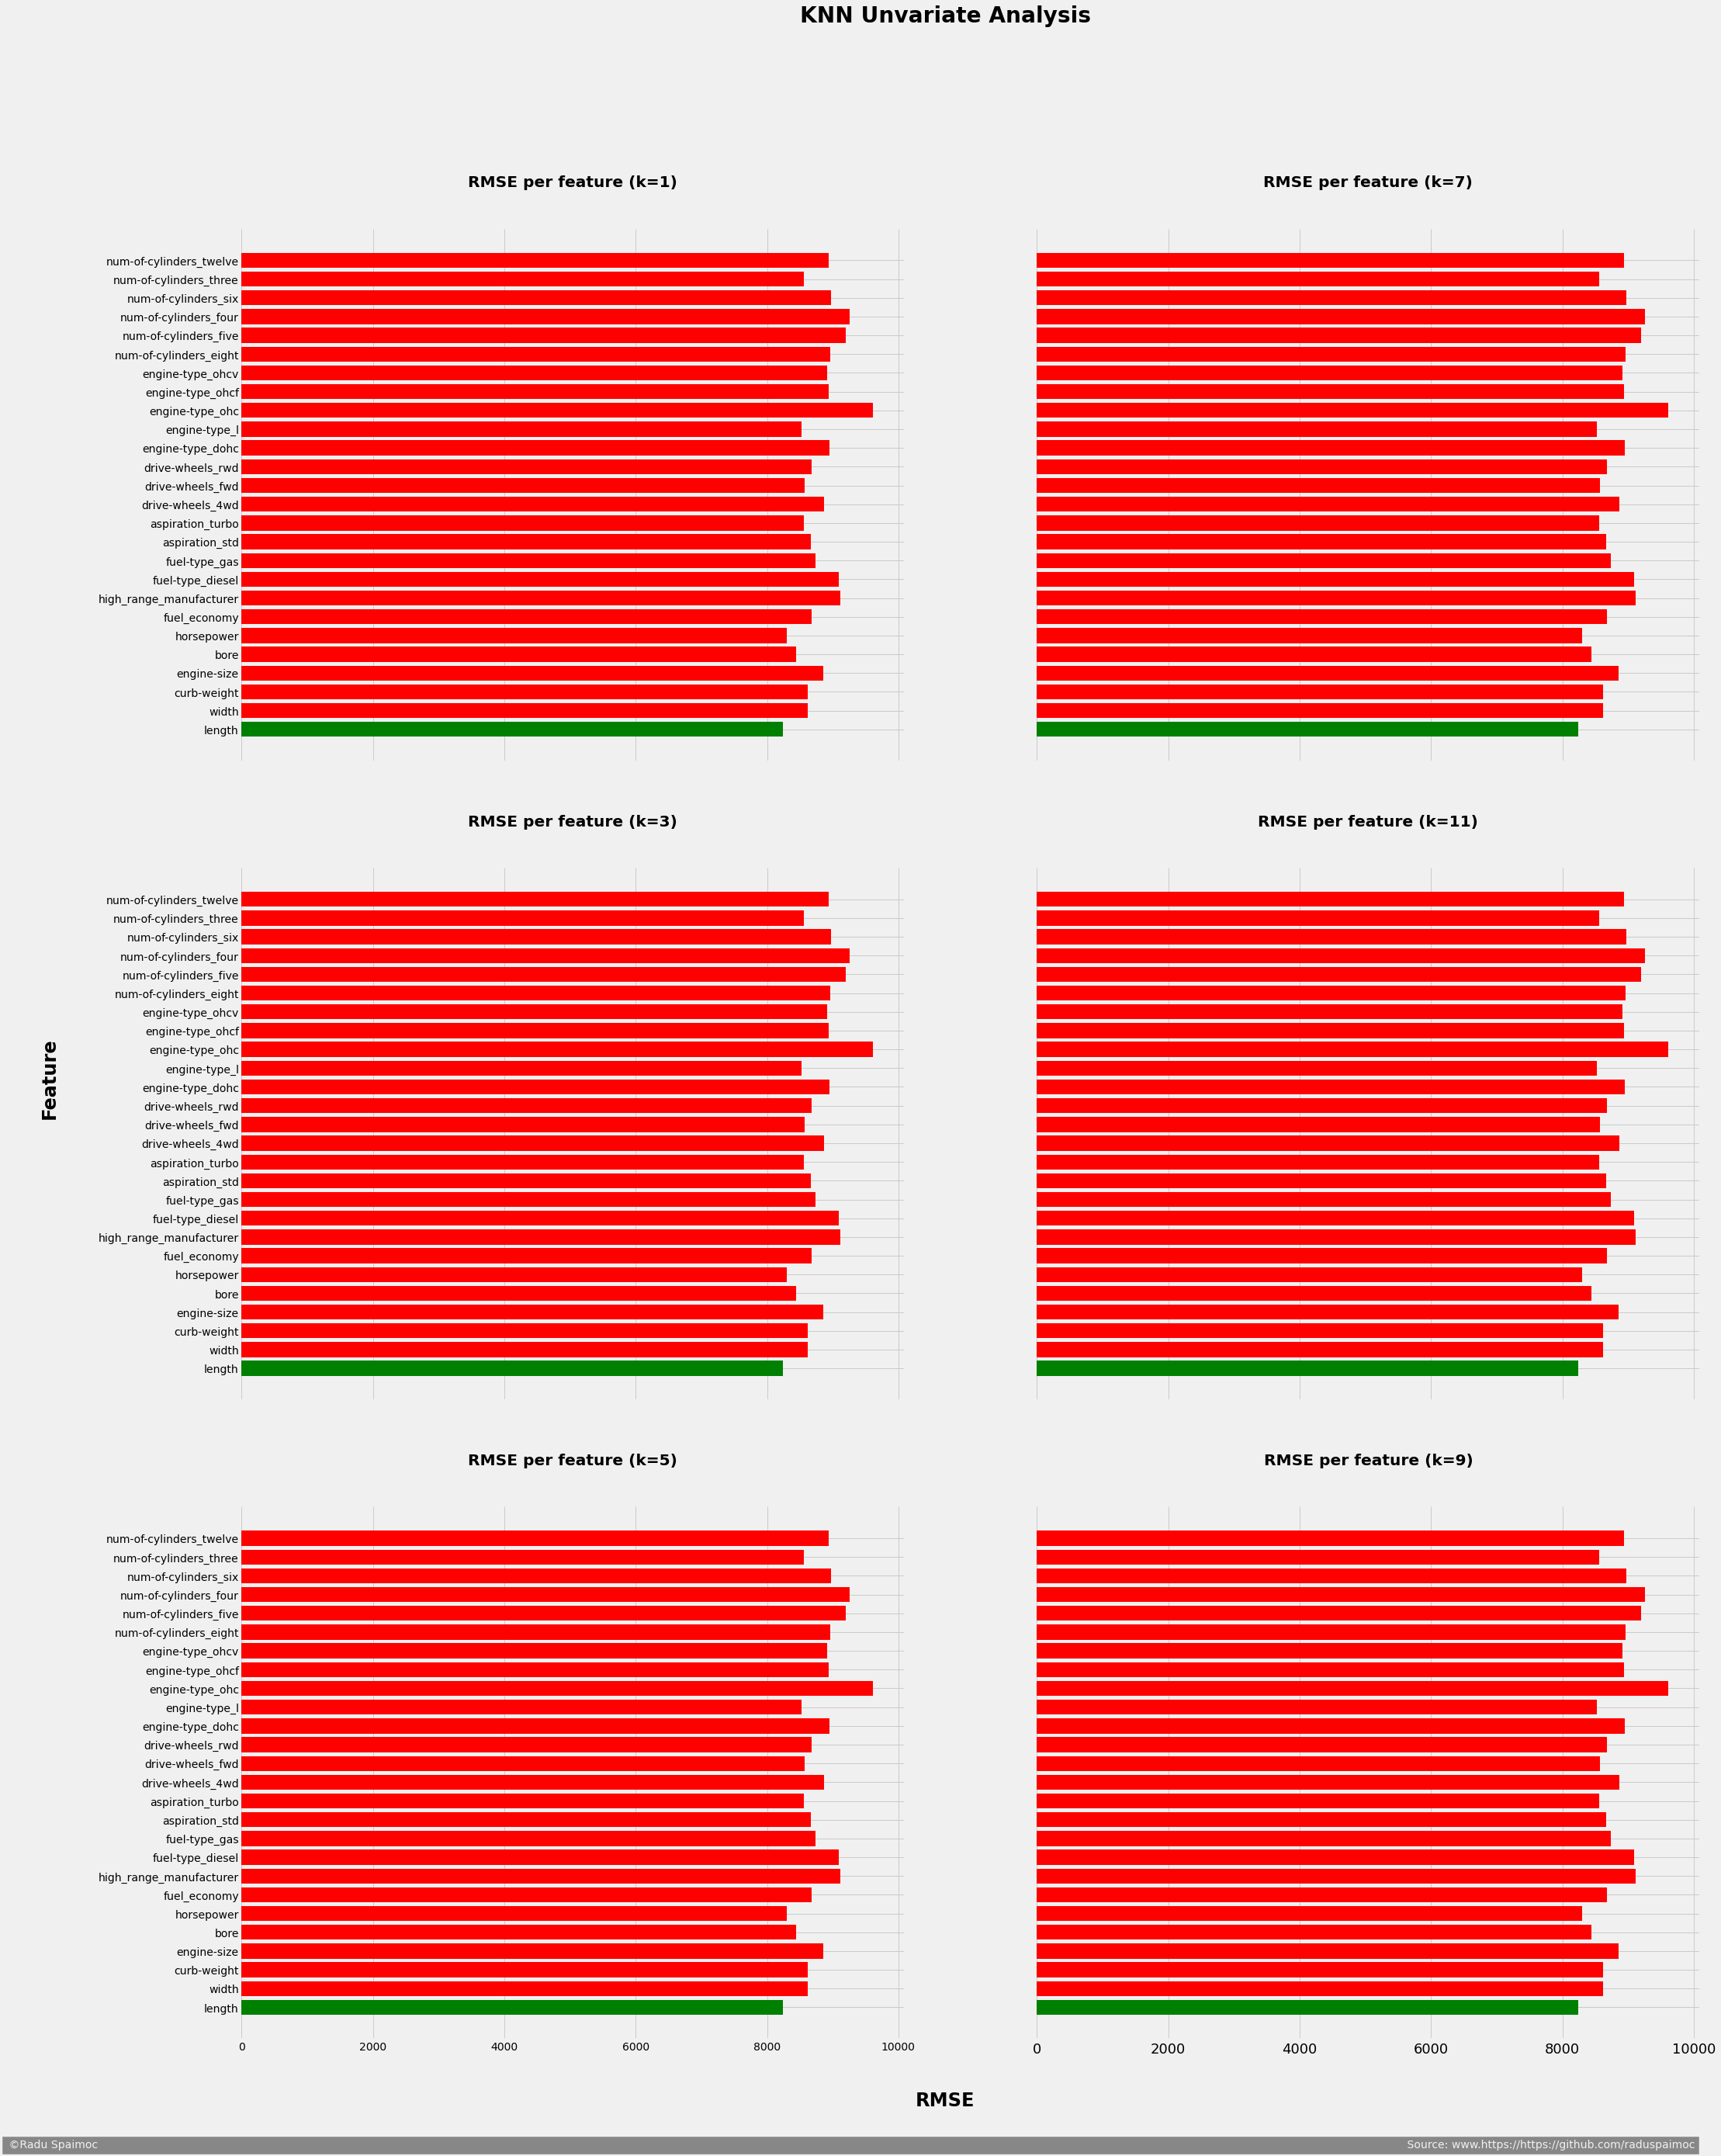

In [76]:
multiple_subplots(finale_rmses,
                  "KNN Unvariate Analysis", 
                  "RMSE per feature", 
                  "RMSE", 
                  "Feature", 
                  sigbar_x=-15700.1, 
                  sigbar_y=-7.5)

From the previous chart we can conclude that for an unvariate KNN, the feature with the lowest RMSE independently of the k is **lenght**.

## Multivariate KNN

From the previous data let's compute the average RMSE for each feature across the differnt k values and obtain the 5 best features.

In [77]:
aux_df = pd.DataFrame(finale_rmses)

In [78]:
aux_df["average_rmse"] = aux_df.mean(axis=1)

In [79]:
aux_df = aux_df.sort_values(by='average_rmse', ascending=True)

In [80]:
top_5_features = aux_df['average_rmse'].head(5)

In [81]:
top_5_features

length                    8244.828491
horsepower                8300.125886
bore                      8441.725073
engine-type_l             8522.825655
num-of-cylinders_three    8563.301495
Name: average_rmse, dtype: float64

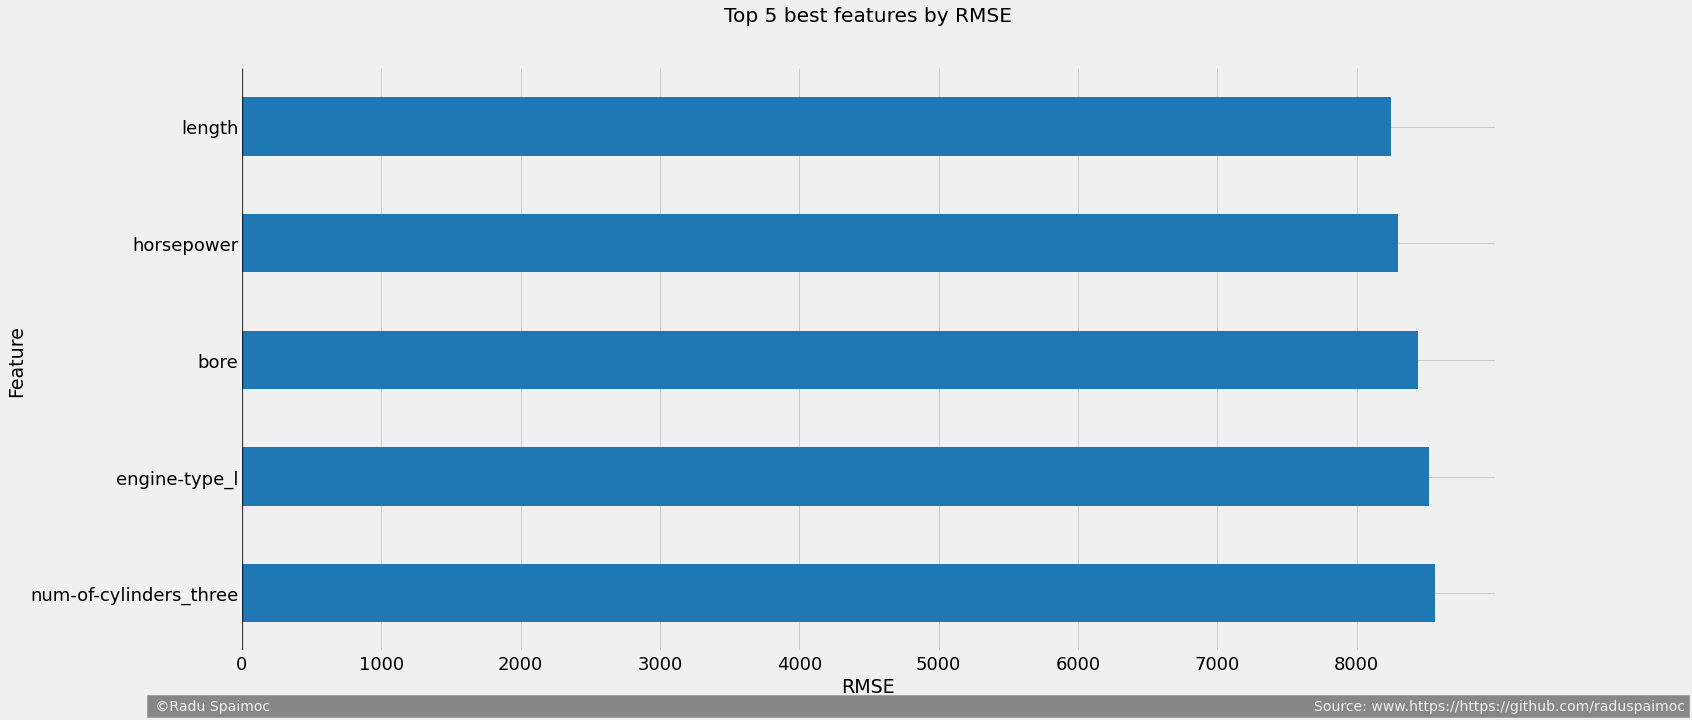

In [82]:
plot_horizontal_bar(top_5_features.sort_values(ascending=False), 
                    "Top 5 best features by RMSE", 
                    "RMSE", 
                    "Feature", 
                    sigbar_x=-650.1,
                    sigbar_y=-1,
                    with_sort=False)

In the previous chart we can see the top 5 features sorted from best to worst.

In [84]:
finale_results = {}

### 2 best features

In [85]:
rmse_dic = {}
finale_rmses = {}

for k in range(1, 25):   
    result = knn_train_test(['num-of-cylinders_three', 'engine-type_l'], 
                            'price', normalized_df, n_neighbors=k)    
    rmse_results.append(result)
    #rmse_dic['2 features'] = result
    finale_rmses[k] = result
finale_results['2 best features'] = finale_rmses

### 3 best features

In [86]:
rmse_dic = {}
finale_rmses = {}

for k in range(1, 25):   
    result = knn_train_test(['num-of-cylinders_three', 'engine-type_l', 'bore'],
                            'price', normalized_df, n_neighbors=k)    
    rmse_results.append(result)
    #rmse_dic['2 features'] = result
    finale_rmses[k] = result
finale_results['3 best features'] = finale_rmses

### 4 best features

In [87]:
rmse_dic = {}
finale_rmses = {}

for k in range(1, 25):   
    result = knn_train_test(['num-of-cylinders_three', 'engine-type_l', 'bore', 'horsepower'], 
                            'price', normalized_df, n_neighbors=k)    
    rmse_results.append(result)
    #rmse_dic['2 features'] = result
    finale_rmses[k] = result
finale_results['4 best features'] = finale_rmses

### 5 best features

In [88]:
rmse_dic = {}
finale_rmses = {}

for k in range(1, 25):   
    result = knn_train_test(['num-of-cylinders_three', 'engine-type_l', 'bore', 'horsepower', 'length'], 
                            'price', normalized_df, n_neighbors=k)    
    rmse_results.append(result)
    #rmse_dic['2 features'] = result
    finale_rmses[k] = result
finale_results['5 best features'] = finale_rmses

### All features

In [89]:
rmse_dic = {}
finale_rmses = {}

for k in range(1, 25):   
    result = knn_train_test(normalized_df.columns.to_list(), 
                            'price', normalized_df, n_neighbors=k)    
    rmse_results.append(result)
    #rmse_dic['2 features'] = result
    finale_rmses[k] = result
finale_results['All features'] = finale_rmses

### Results comparison

In [91]:
finale_df = pd.DataFrame(finale_results)
finale_df["k"] = finale_df.index

In [92]:
df = get_orderd_dataframe("2 best features", 2, finale_df)
df = pd.concat([df, 
                get_orderd_dataframe("3 best features", 3, finale_df),
                get_orderd_dataframe("4 best features", 4, finale_df),
                get_orderd_dataframe("5 best features", 5, finale_df),
                get_orderd_dataframe("All features", 'All', finale_df)]               
              )
df

,k,RMSE,features
1,1,10780.569096,2
2,2,8656.334284,2
3,3,8647.342874,2
4,4,10245.625120,2
5,5,9653.782072,2
...,...,...,...
20,20,3777.694859,All
21,21,3888.640592,All
22,22,3971.956361,All
23,23,4067.149421,All


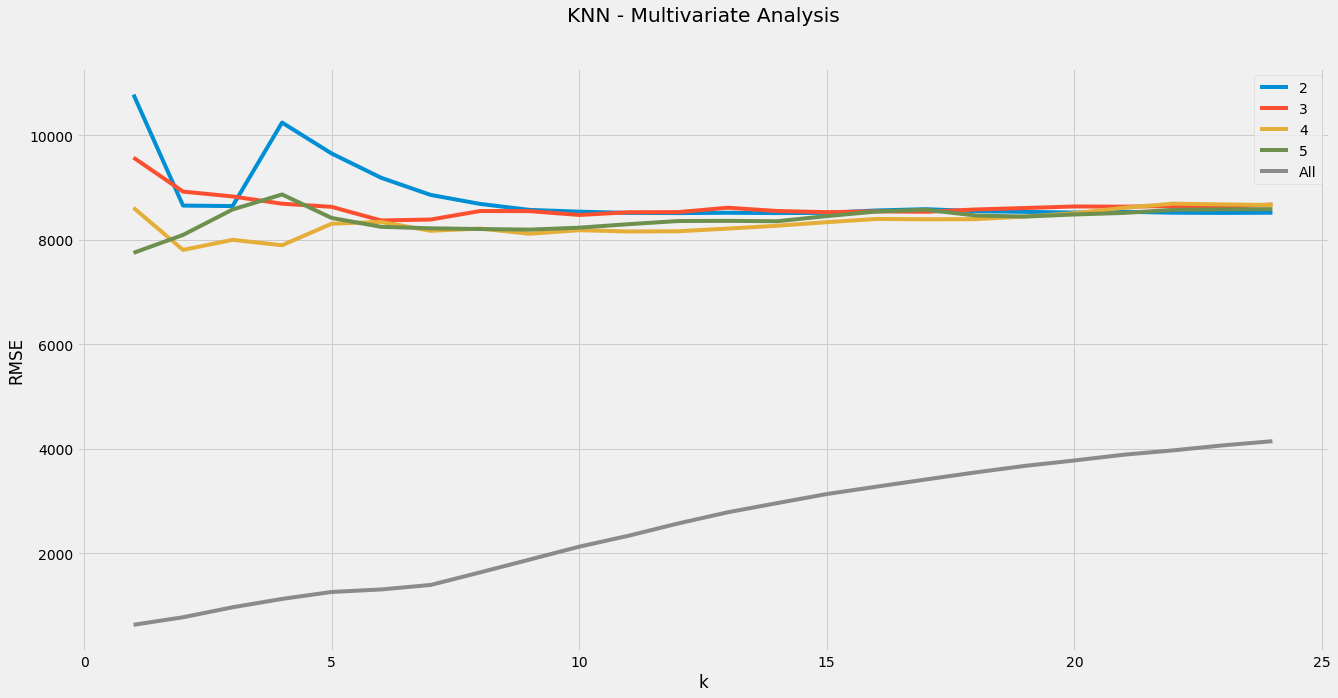

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=df['k'], y=df["RMSE"], hue=df['features'])
ax.set_title("KNN - Multivariate Analysis", y = 1.07)
plt.legend()

In [94]:
df[(df.k < 5) & (df.features=='All')]

,k,RMSE,features
1,1,632.874684,All
2,2,776.976074,All
3,3,968.065182,All
4,4,1128.079063,All


From the previous multivariate analysis, the optimal value or the lowest**RMSE** achived is in the range **632 - 1128** using all the features avilable and a **K** valueue between 1 and 5.

## Linear Regression

All throughout the analysis, it was clear that many variables share a linear relationship with the price variable. All numrical columns chosen were either **positively or negatively** correlated to the price. This was confirmed in the regplots. The categorical varibles also showed distinct average price differences, leading to the conclusion that a certain category can give an idea about the price of the vehicle. The **LinearRegression** model is used keeping all of this in mind.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df[normalized_df.columns.tolist()[:-1]],
                                                    normalized_df["price"],
                                                    random_state=1)

In [96]:
normalized_df[normalized_df.columns.tolist()[:-1]]

,length,width,curb-weight,engine-size,bore,horsepower,fuel_economy,high_range_manufacturer,high_range_manufacturer,high_range_manufacturer,...,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve
0,-0.438504,-0.839749,-0.021018,0.049883,0.518555,0.204599,-0.639027,-0.278115,-0.278115,-0.278115,...,-0.256074,-1.658312,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796
1,-0.438504,-0.839749,-0.021018,0.049883,0.518555,0.204599,-0.639027,-0.278115,-0.278115,-0.278115,...,-0.256074,-1.658312,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796
2,-0.245646,-0.181548,0.504425,0.582216,-2.394771,1.342993,-0.884745,-0.278115,-0.278115,-0.278115,...,-0.256074,-1.658312,-0.288675,3.741657,-0.144715,-0.232495,-1.968502,2.669270,-0.071796,-0.071796
3,0.188283,0.147553,-0.424175,-0.458253,-0.514016,-0.033670,-0.178304,-0.278115,-0.278115,-0.278115,...,-0.256074,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796
4,0.188283,0.241582,0.506335,0.195065,-0.514016,0.310496,-1.222609,-0.278115,-0.278115,-0.278115,...,-0.256074,0.603023,-0.288675,-0.267261,-0.144715,4.301163,-1.968502,-0.374634,-0.071796,-0.071796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.168643,1.416941,0.750905,0.316049,1.661759,0.284022,-0.393308,-0.278115,-0.278115,-0.278115,...,-0.256074,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796
191,1.168643,1.369927,0.936243,0.316049,1.661759,1.501839,-0.946175,-0.278115,-0.278115,-0.278115,...,-0.256074,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,0.508001,-0.374634,-0.071796,-0.071796
192,1.168643,1.416941,0.865547,1.090351,0.924208,0.813507,-1.161179,-0.278115,-0.278115,-0.278115,...,-0.256074,-1.658312,-0.288675,3.741657,-0.144715,-0.232495,-1.968502,2.669270,-0.071796,-0.071796
193,1.168643,1.416941,1.257240,0.412837,-1.177812,0.072227,-0.178304,-0.278115,-0.278115,-0.278115,...,-0.256074,0.603023,-0.288675,-0.267261,-0.144715,-0.232495,-1.968502,2.669270,-0.071796,-0.071796


In [108]:
lr_model = LinearRegression()

In [109]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [110]:
pred_train = lr_model.predict(X_train)
print("Train score: ", r2_score(pred_train, y_train))

Train score:  -5.180396746741571


In [111]:
pred_test = lr_model.predict(X_test)
print("Test score: ", r2_score(pred_test, y_test))

Test score:  -3.091706866954884


In [112]:
print("RMSE: ",np.sqrt(mean_squared_error(pred_test,y_test)))

RMSE:  7863.872346487718


In [113]:
print("intercept : ",lr_model.intercept_)
for col,coef in zip(X_train.columns,lr_model.coef_):
    print(col, " : ",coef)

intercept :  12829.783382037092
length  :  -2106.4906049542965
width  :  2176.2057499268444
curb-weight  :  -2830.944528742426
engine-size  :  188.46075779558464
bore  :  0.5001866052360084
horsepower  :  494.9032744703262
fuel_economy  :  -1175.4349294352737
high_range_manufacturer  :  -1009.2719986403032
high_range_manufacturer  :  -1009.2719986403018
high_range_manufacturer  :  -1009.2719986403032
high_range_manufacturer  :  -1009.271998640305
fuel-type_diesel  :  124.84455109070366
fuel-type_gas  :  -124.84455109070326
aspiration_std  :  -361.65381138805
aspiration_turbo  :  361.6538113880487
drive-wheels_4wd  :  -687.5434965723751
drive-wheels_fwd  :  162.24982993385692
drive-wheels_rwd  :  117.88320639295694
engine-type_dohc  :  -167.6484100092407
engine-type_l  :  1261.5337046936074
engine-type_ohc  :  -83.52190588175682
engine-type_ohcf  :  1103.8048912434542
engine-type_ohcv  :  -2084.929758118845
num-of-cylinders_eight  :  3657.793251848611
num-of-cylinders_five  :  352.42477

/home/radu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


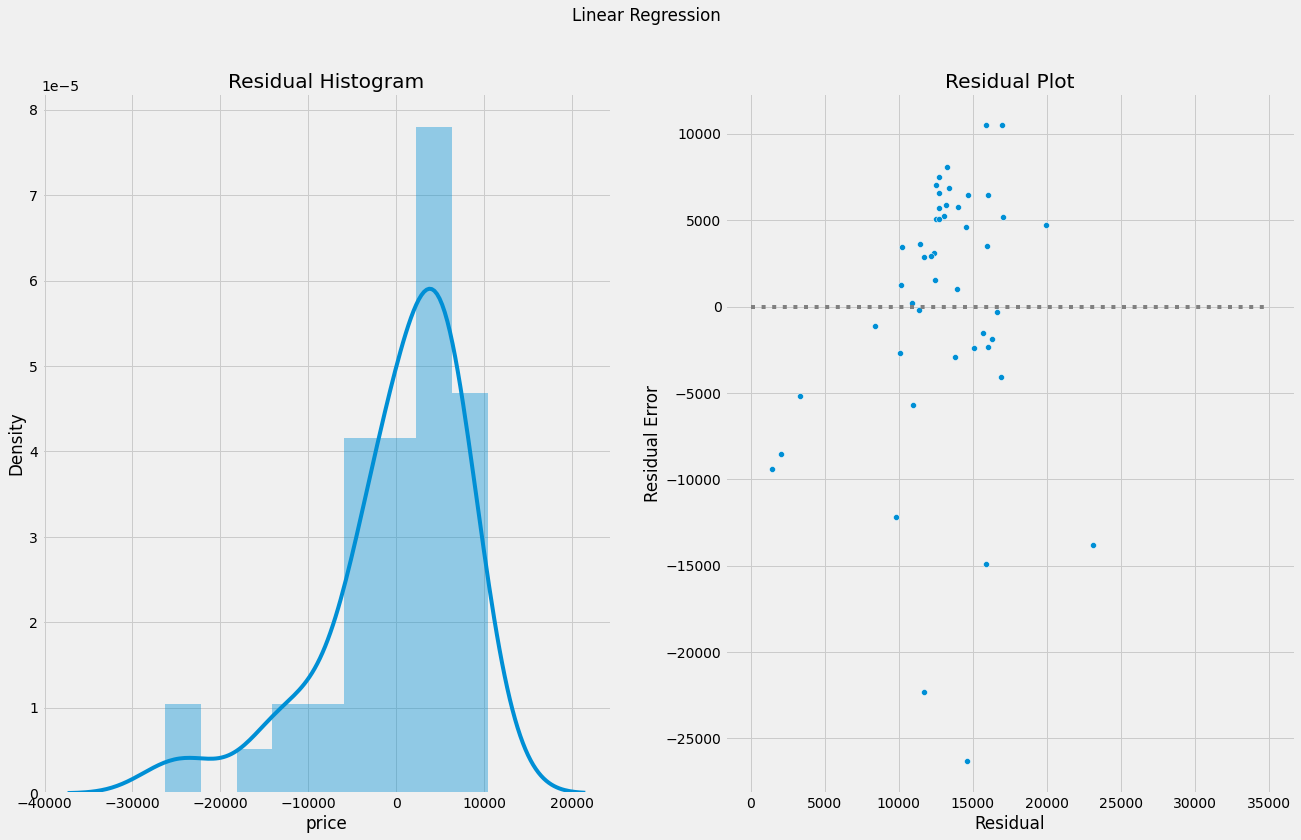

In [143]:
get_residual_plots("Linear Regression", pred_test, y_test)

### Ridge Regression

In [144]:
lm = Ridge(alpha=2)
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))

Train score:  -6.126135028443862
Test_score:  -4.1601053640760535
RMSE:  7776.643206285362


In [145]:
print("intercept : ",lm.intercept_)
for col,coef in zip(X_train.columns,lm.coef_):
    print(col, " : ",coef)

intercept :  12854.504925634023
length  :  -1877.569052181659
width  :  1998.5538941389225
curb-weight  :  -2135.1108363089706
engine-size  :  570.3338445689757
bore  :  -355.1631981916379
horsepower  :  323.45254740431164
fuel_economy  :  -872.9445659402408
high_range_manufacturer  :  -926.9081103761018
high_range_manufacturer  :  -926.9081103760973
high_range_manufacturer  :  -926.9081103760975
high_range_manufacturer  :  -926.9081103760986
fuel-type_diesel  :  6.196844591763223
fuel-type_gas  :  -6.196844591767992
aspiration_std  :  -378.3511583024871
aspiration_turbo  :  378.3511583024867
drive-wheels_4wd  :  -736.3573149623483
drive-wheels_fwd  :  168.89164596576924
drive-wheels_rwd  :  131.2288375347557
engine-type_dohc  :  -137.83546754829968
engine-type_l  :  1069.3049133644079
engine-type_ohc  :  -148.04576916573217
engine-type_ohcf  :  1193.5709944696982
engine-type_ohcv  :  -1909.9619643024746
num-of-cylinders_eight  :  3184.2127871727753
num-of-cylinders_five  :  364.236308

/home/radu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


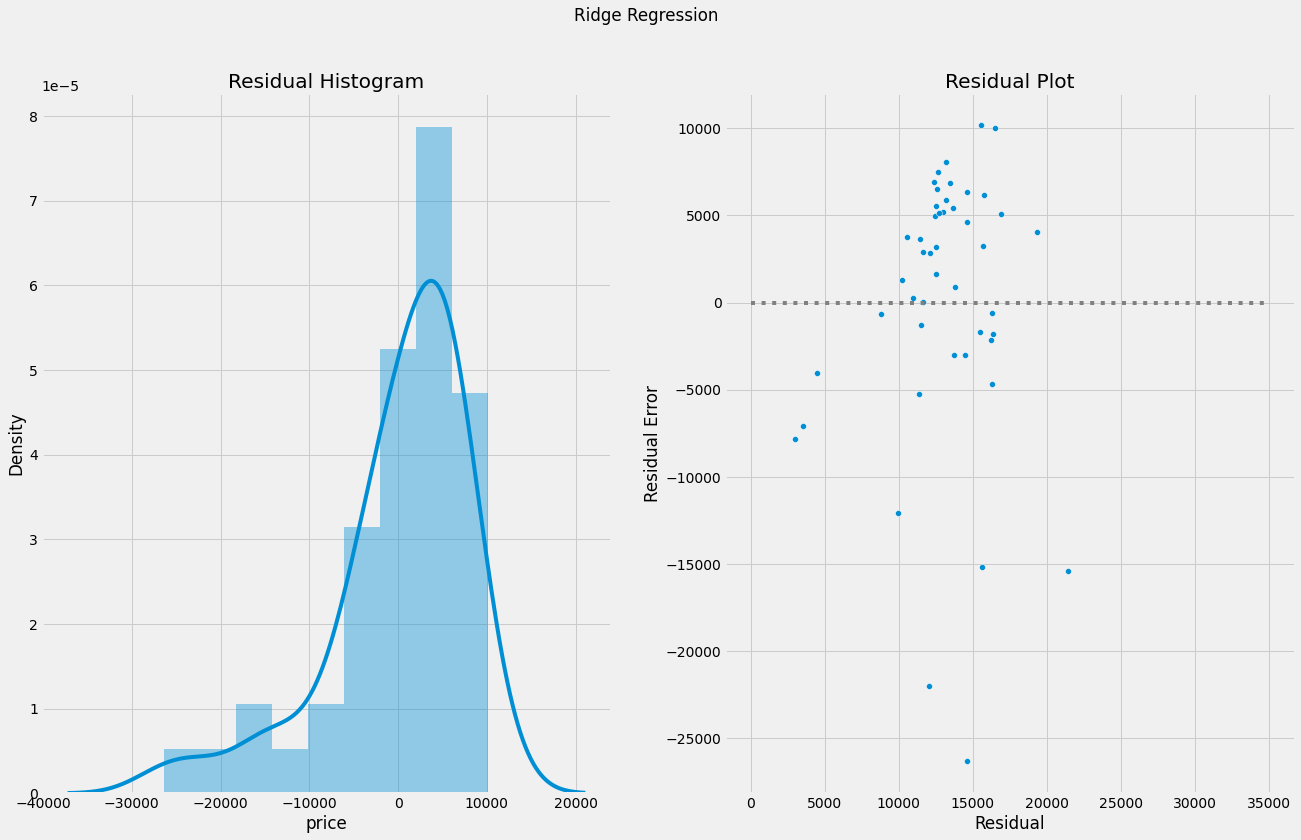

In [147]:
get_residual_plots("Ridge Regression", pred, y_test)

### Lasso Regression

In [148]:
lm = Lasso(alpha=4)
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  -5.327814661025408
Test_score:  -2.9652614816695806
RMSE:  7784.098175197688
MAE:  5865.657424552157


In [149]:
print("intercept : ",lm.intercept_)
for col,coef in zip(X_train.columns,lm.coef_):
    print(col, " : ",coef)

intercept :  12842.835904158186
length  :  -2079.9902642528873
width  :  2150.338072820432
curb-weight  :  -2710.940459993139
engine-size  :  164.11261950726185
bore  :  -0.0
horsepower  :  454.43766697305875
fuel_economy  :  -1114.9079271170501
high_range_manufacturer  :  -3966.7608645426153
high_range_manufacturer  :  -0.0
high_range_manufacturer  :  -0.0
high_range_manufacturer  :  -0.0
fuel-type_diesel  :  201.15763506944631
fuel-type_gas  :  -0.0
aspiration_std  :  -733.7518352309085
aspiration_turbo  :  7.595807598382833e-12
drive-wheels_4wd  :  -740.5040259497555
drive-wheels_fwd  :  41.84279537015632
drive-wheels_rwd  :  -0.0
engine-type_dohc  :  -106.41493743947086
engine-type_l  :  1282.1432275528798
engine-type_ohc  :  -0.0
engine-type_ohcf  :  1148.7116631567017
engine-type_ohcv  :  -2004.5809037147687
num-of-cylinders_eight  :  3373.9038252375967
num-of-cylinders_five  :  -0.0
num-of-cylinders_four  :  -2779.875180077413
num-of-cylinders_six  :  0.0
num-of-cylinders_three 

/home/radu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


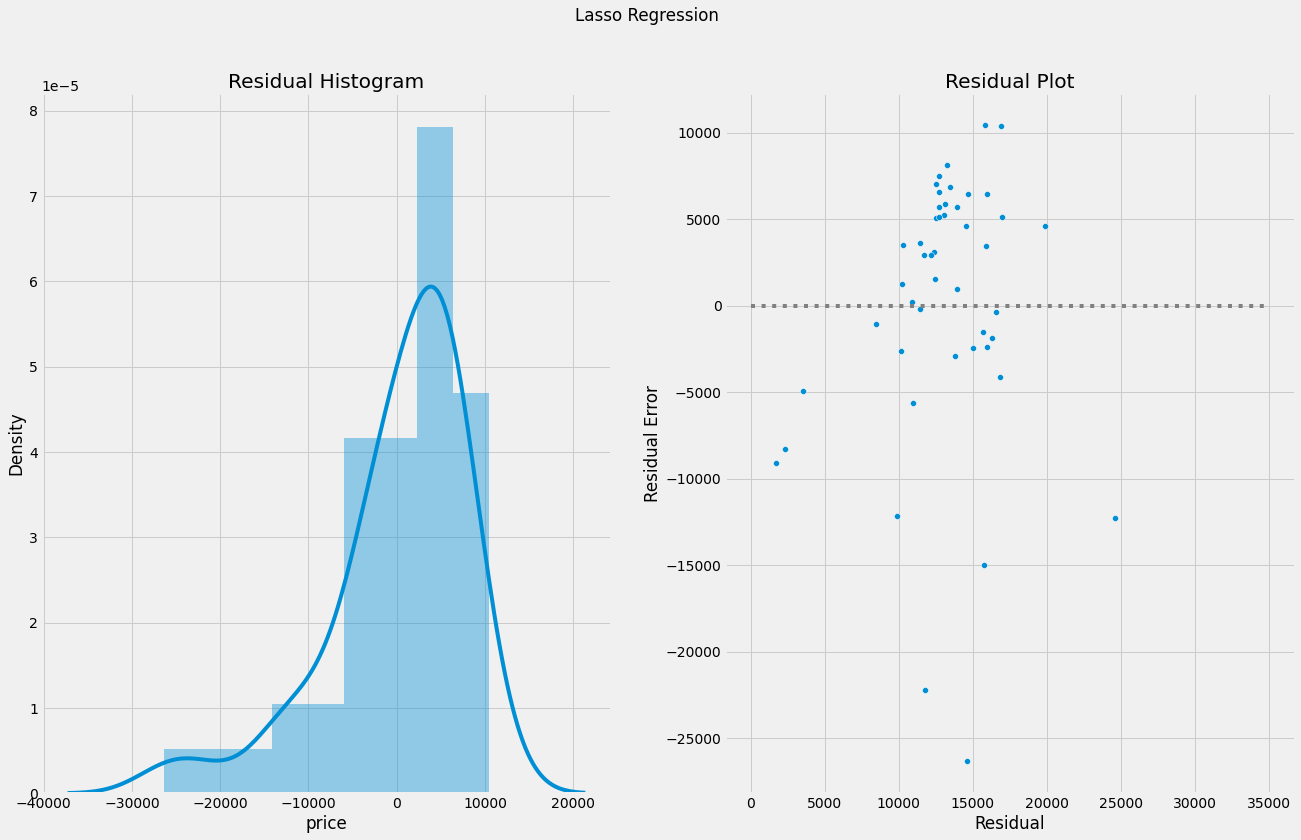

In [150]:
get_residual_plots("Lasso Regression", pred, y_test)

###  Elastic Net

In [151]:
lm = ElasticNet(alpha=0.5,l1_ratio=1, max_iter=2000)
lm.fit(X_train,y_train)

pred = lm.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = lm.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  -5.198628046170515
Test_score:  -2.860131712230022
RMSE:  7804.50922144755
MAE:  5885.849809342255


/home/radu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


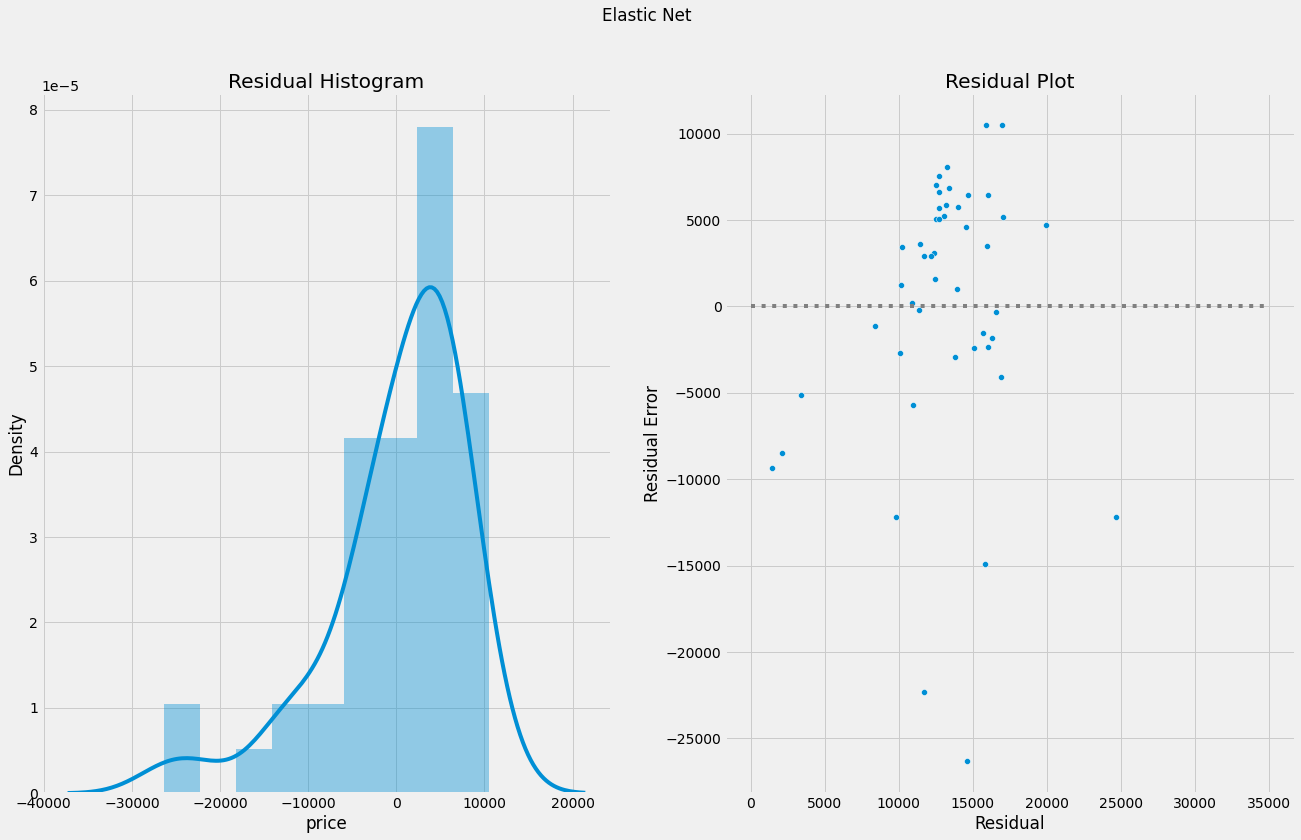

In [152]:
get_residual_plots("Elastic Net", pred, y_test)

## Random Forest Regressor

In [155]:
rf = RandomForestRegressor(random_state=101)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=101)

In [157]:
pred = rf.predict(X_train)
print("Train score: ",r2_score(pred,y_train))

pred = rf.predict(X_test)
print("Test_score: ",r2_score(pred,y_test))

print("RMSE: ",np.sqrt(mean_squared_error(pred,y_test)))
print("MAE: ",mean_absolute_error(pred,y_test))

Train score:  0.8190757110333831
Test_score:  -2.302460064142378
RMSE:  7475.169357093334
MAE:  4980.0739361702135


/home/radu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


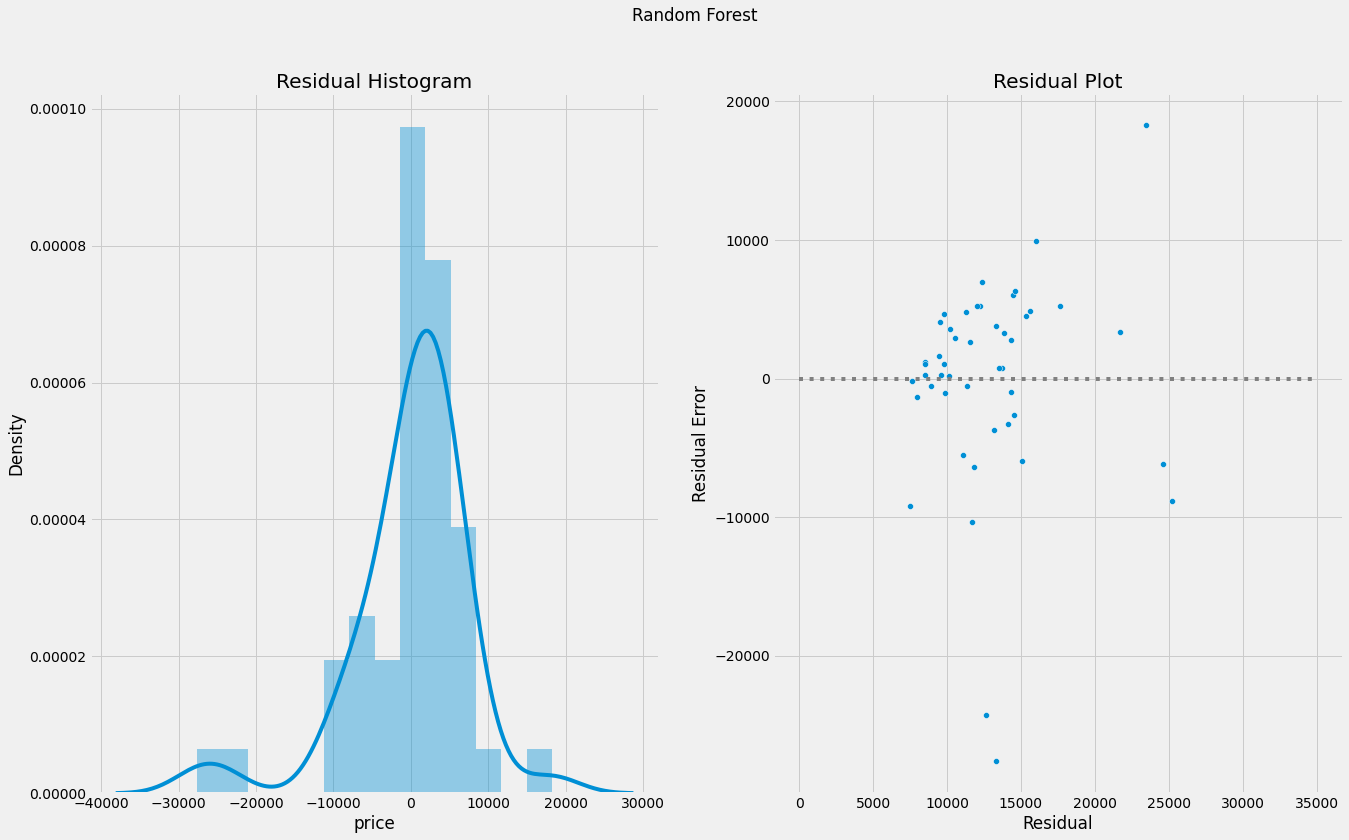

In [158]:
get_residual_plots("Random Forest", pred, y_test)